# Table of Content

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [Introduction](#introduction)
  - [Objectives](#objective)
  - [Analysis steps](#analysis-steps)
  - [Data dictionary](#data-dictionary)
  - [Acknowledgments](#acknowledgements)
  - [Packages](#packages)
- [1-Data Exploration](#1-data-exploration)
- [2-Data Preprocessing](#2-data-preprocessing)
- [3-Analyses - ITT](#3-analyses)
  - [In Depth Exploratory Data Analysis]
  - [Attrition Analysis]
  - [Compliance Analysis]
  - [Data Imputation]
  - [Statistical Model]
  - [Assumptions]
- [4-Analyses - PP]
  - [In Depth Exploratory Data Analysis]
  - [Attrition Analysis]
  - [Compliance Analysis]
  - [Data Imputation]
  - [Statistical Model]
  - [Assumptions]
- [5-Sensitivity Analysis]
- [6-General Conclusion]

# 0-General
[Back to Table of Content](#table-of-content)
# Exploring the Effects of Hypnotherapy and Aromatherapy via MindspaceOne

## Introduction
[Back to Table of Content](#table-of-content)

The **MindspaceOne** project investigates the effects of combining hypnotherapy and aromatherapy, delivered via a smartphone-based platform, on individuals' ability to achieve targeted states of relaxation or concentration. As modern life grows increasingly stressful, particularly among younger individuals, there is a pressing need for accessible interventions to support mental health and well-being. This project seeks to evaluate whether coupling hypnotherapy with aromatherapy through classical conditioning can enhance the effectiveness of these interventions.

In this controlled, randomized experimental pilot study, participants are assigned to one of four groups: (I) Hypnotherapy + Aromatherapy, (II) Hypnotherapy alone, (III) Aromatherapy alone, or (IV) a control group. Over a 4-week period, participants will engage with the assigned treatment daily, followed by a 1-week test phase for conditioning effects in selected groups.

## Objective
[Back to Table of Content](#table-of-content)

The primary objective of this study is to assess whether daily hypnotherapy sessions, with or without aromatherapy, can improve participants' relaxation and concentration as measured by the **Multidimensional Mood Questionnaire (MDBF)** subscales. Secondary objectives include evaluating whether the effects of hypnotherapy can be conditioned to aromatherapy and exploring the influence of other variables such as age, gender, and stress levels.

## Hypotheses
#### Primary Hypothesis (H1):
- Hypnotherapy, delivered via a smartphone-based platform, enhances relaxation and concentration, as indicated by improvements on the MDBF subscales (calculated as the change from baseline to the end of the 4-week intervention).

#### Secondary Hypotheses:
1. Aromatherapy combined with hypnotherapy enhances the conditioning effect, where aromatherapy alone can trigger the same relaxation or concentration effects as hypnotherapy.
2. Exploratory analysis will examine the effects on perceived stress (PSS) and well-being (WHO-5), as well as the moderating role of age, gender, and socioeconomic status.


## Analysis steps
[Back to Table of Content](#table-of-content)

1. **In-Depth Exploratory Data Analysis:** Examine the structure and distribution of data. Identify outliers and assess relationships between variables. Visualize data for key insights.
2. **Attrition Analysis:** Assess dropout patterns and identify potential biases due to participant attrition.
3. **Compliance Analysis:** Evaluate adherence to the intervention protocols across groups to determine the consistency of treatments.
4. **Data Imputation:** Address missing data through multiple imputation techniques, ensuring robust statistical analysis.
5. **Model:** Fit a mixed effects model to evaluate changes over time and between groups for primary and secondary outcomes. Test for differences between groups using inferential statistics.
6. **Assumptions:** Validate statistical assumptions, including normality of residuals, homogeneity of variances, and absence of significant outliers.

## Data Dictionary
[Back to Table of Content](#table-of-content)

| Variable              | Description                                             | Data Type   |
|-----------------------|---------------------------------------------------------|-------------|
| Participant_ID        | Unique identifier for each participant                  | Character   |
| Group                 | Assigned intervention group (I, II, III, IV)            | Character   |
| V0_MDBF_WM            | Baseline score for Wakefulness-Fatigue (MDBF subscale)  | Numeric     |
| V0_MDBF_RU            | Baseline score for Calmness-Restlessness (MDBF subscale)| Numeric     |
| Daily_Session_Usage   | Count of sessions completed daily                       | Numeric     |
| Aroma_Used            | Binary indicator for aromatherapy use (1 = Yes, 0 = No)| Binary      |
| VAS_Preload_Relax     | Pre-treatment relaxation score (Visual Analog Scale)    | Numeric     |
| VAS_Postload_Relax    | Post-treatment relaxation score (Visual Analog Scale)   | Numeric     |
| ...                   | ...                                                     | ...         |

## Acknowledgements
[Back to Table of Content](#table-of-content)

We extended our gratitude to Priv.-Doz. Dr. Michael Teut for his invaluable contribution to the execution of this study. We also express gratitude to the entire research group of [Prof. Dr. med. Seifert](https://kinderonkologie.charite.de/forschung/ag_seifert/team/) and all participants for their invalubale contributions to this study as well as thanks to the funding agencies. Statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw this notebook.


# Packages
[Back to Table of Content](#table-of-content)

In [239]:
# Define required packages
packages <- c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr", "lmerTest",
              "lubridate", "data.table", "plyr", "reshape2", "MASS", 'naniar', "broom.mixed",
              "readxl", "mice", "gridExtra", "rlang", "glmmTMB", "DHARMa", "grid")

# Function to install and load packages silently
install_and_load <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) install.packages(pkg, quiet = TRUE)
  suppressPackageStartupMessages(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
}

# Apply function to all packages
invisible(lapply(packages, install_and_load))

also installing the dependency 'furrr'


Warning message:
"package 'broom.mixed' was built under R version 4.3.3"


In [2]:
# Define the working directory
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/MindspaceOne"

In [3]:
# Read in data
mind <- read_csv(file.path(path, "data", "cleaned_mindspaceone_2025-Jan-30.csv"))

Rows: 6828 Columns: 83
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (32): Serial_Nr, Quest_Nr, questions_ended, viewer, my_group, gender, a...
dbl  (50): where_did_the_viewer_ended, where_did_the_participant_ended, prop...
dttm  (1): time_started

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1-Data Exploration
[Back to Table of Content](#table-of-content)

In [4]:
# Display the first rows and columns
head(mind)  # Shows the first 6 rows

Serial_Nr  Quest_Nr time_started        questions_ended viewer      
1 LQC2G9NUZM Sozio    2024-07-14 21:25:50 finished        participants
2 QAW8A947WE Sozio    2024-07-16 07:48:39 finished        participants
3 QAW8A947WE V0       2024-07-16 07:51:46 finished        participants
4 T7DET1M83P Sozio    2024-07-16 08:07:08 finished        participants
5 TL5FD2ZDNR Sozio    2024-07-16 11:16:07 finished        participants
6 QAW8A947WE Int_0    2024-07-16 16:36:53 finished        participants
  where_did_the_viewer_ended where_did_the_participant_ended
1  9                          9                             
2  9                          9                             
3 13                         13                             
4  9                          9                             
5  9                          9                             
6  5                          5                             
  proportion_missing_answers proportion_missing_answers_weighted
1  9                          1                                 
2  9                          1                                 
3  0                          0                                 
4 18                         11                                 
5  9                          1                                 
6  0                          0                                 
  answering_speed ... who5_3 who5_4 who5_5 pre_mood pre_emotions post_mood
1 0.31            ... NA     NA     NA     NA       NA           NA       
2 0.86            ... NA     NA     NA     NA       NA           NA       
3 1.20            ...  5      5      6     NA       NA           NA       
4 0.51            ... NA     NA     NA     NA       NA           NA       
5 0.78            ... NA     NA     NA     NA       NA           NA       
6 0.89            ... NA     NA     NA      6        9            6       
  post_emotions aroma_received aroma_tested occupation   
1 NA            NA             NA           Employee     
2 NA            NA             NA           Self-Employed
3 NA            NA             NA           NA           
4 NA            NA             NA           Retired      
5 NA            NA             NA           Civil Servant
6  7            NA             NA           NA

In [5]:
# Get and print the dimensions of the data frame (rows x columns)
cat("Dataset dimensions:", dim(mind)[1], "rows and", dim(mind)[2], "columns\n")

Dataset dimensions: 6828 rows and 83 columns


In [6]:
# Show the precise structure of the data frame
str(mind)

spc_tbl_ [6,828 x 83] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Serial_Nr                          : chr [1:6828] "LQC2G9NUZM" "QAW8A947WE" "QAW8A947WE" "T7DET1M83P" ...
 $ Quest_Nr                           : chr [1:6828] "Sozio" "Sozio" "V0" "Sozio" ...
 $ time_started                       : POSIXct[1:6828], format: "2024-07-14 21:25:50" "2024-07-16 07:48:39" ...
 $ questions_ended                    : chr [1:6828] "finished" "finished" "finished" "finished" ...
 $ viewer                             : chr [1:6828] "participants" "participants" "participants" "participants" ...
 $ where_did_the_viewer_ended         : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ where_did_the_participant_ended    : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ proportion_missing_answers         : num [1:6828] 9 9 0 18 9 0 0 0 0 0 ...
 $ proportion_missing_answers_weighted: num [1:6828] 1 1 0 11 1 0 0 0 0 0 ...
 $ answering_speed                    : num [1:6828] 0.31 0.86 1.2 0.51 0.78 0.89 0.49 0.39 0.61 1

In [10]:
# List of variables to convert to factors
factor_vars <- c("Serial_Nr", "Quest_Nr", "my_group", "gender", "age_group", 
                 "education", "educational_degree", "income", 
                 "stressor_minors_0to6", "stressor_minor_7to13", "stressor_minor_14above",
                 "stressor_minor_handicapped", "stressor_adult_handicapped",
                 "stressor_shifting_shifts", "stressor_night_shift", "stressor_weekend_work",
                 "stressor_seated_work", "stressor_seated_stood_work", "stressor_physical_work",
                 "relaxation_pmr", "relaxation_aroma", "relaxation_yoga", "relaxation_meditation",
                 "relaxation_massagen", "relaxation_sport", "relaxation_hypnosis", 
                 "relaxation_at", "relaxation_breathing", "relaxation_rest", "occupation")

In [11]:
# Apply factor conversion
mind <- mind %>%
  mutate_at(vars(all_of(factor_vars)), as.factor)

In [15]:
# Identify duplicated participants at each time point
duplicates_per_timepoint <- mind %>%
  dplyr::group_by(Quest_Nr, Serial_Nr) %>%  # Group by time point and participant ID
  filter(n() > 1) %>%  # Keep only participants who appear more than once per time point
  ungroup()

In [17]:
# Summarize duplicate counts per time point
duplicates_summary <- duplicates_per_timepoint %>%
  dplyr::count(Quest_Nr) %>%
  arrange(desc(n))  # Sort by number of duplicates

In [18]:
# Display the number of duplicates per Quest_Nr
print(duplicates_summary)

# A tibble: 2 x 2
  Quest_Nr     n
  <fct>    <int>
1 Int_0      110
2 Int_W5_1     2


#### Interpretation of Duplicate Counts per `Quest_Nr`

Your output shows that **duplicates exist at two time points**:

| Quest_Nr  | n   | Interpretation |
|-----------|-----|----------------|
| **Int_0** | 110 | There are **110 duplicated participant responses** at `Quest_Nr = Int_0`. This suggests that some participants may have completed the questionnaire **more than once at this time point**. It could be due to re-submissions, technical issues, or unintended repeated entries. |
| **Int_W5_1** | 2 | Only **2 duplicated participant responses** were found at `Quest_Nr = Int_W5_1`. This indicates that repeated entries at this time point are very rare and may be **isolated cases** rather than a systematic issue. |

#### **What Does This Mean?**
1. **`Int_0` has a substantial number of duplicates (110 cases).**  
   - This suggests that something **systematic** happened at this time point, leading to repeated entries.
   - You should **investigate why so many duplicates exist at this time point** (e.g., did participants accidentally complete the survey twice? Was there an issue with the survey system?).
   
2. **`Int_W5_1` has only 2 duplicates, which is minor.**  
   - This is likely due to individual participant behavior rather than a broader issue.
   - You may want to review these two cases manually.

#### What do Int_0 and Int_W5_1 measure?

XXXX

In [19]:
# Check duplicates at Quest_Nr = V0
duplicates_V0 <- mind %>%
  filter(Quest_Nr == "V0") %>%
  dplyr::group_by(Serial_Nr) %>%
  filter(n() > 1) %>%
  ungroup()

In [20]:
# Check duplicates at Quest_Nr = V3W5
duplicates_V3W5 <- mind %>%
  filter(Quest_Nr == "V3W5") %>%
  dplyr::group_by(Serial_Nr) %>%
  filter(n() > 1) %>%
  ungroup()


In [23]:
# Print the duplicate rows
print(duplicates_V0)
print(duplicates_V3W5)

# A tibble: 0 x 83
# i 83 variables: Serial_Nr <fct>, Quest_Nr <fct>, time_started <dttm>,
#   questions_ended <chr>, viewer <chr>, where_did_the_viewer_ended <dbl>,
#   where_did_the_participant_ended <dbl>, proportion_missing_answers <dbl>,
#   proportion_missing_answers_weighted <dbl>, answering_speed <dbl>,
#   my_group <fct>, gender <fct>, age_group <fct>, education <fct>,
#   educational_degree <fct>, income <fct>, stressor_minors_0to6 <fct>,
#   stressor_minor_7to13 <fct>, stressor_minor_14above <fct>, ...
# A tibble: 0 x 83
# i 83 variables: Serial_Nr <fct>, Quest_Nr <fct>, time_started <dttm>,
#   questions_ended <chr>, viewer <chr>, where_did_the_viewer_ended <dbl>,
#   where_did_the_participant_ended <dbl>, proportion_missing_answers <dbl>,
#   proportion_missing_answers_weighted <dbl>, answering_speed <dbl>,
#   my_group <fct>, gender <fct>, age_group <fct>, education <fct>,
#   educational_degree <fct>, income <fct>, stressor_minors_0to6 <fct>,
#   stressor_minor_7to13 <fc

#### Interpretation of Duplicate Row Output
The output indicates that **no duplicate rows were found** for `Quest_Nr = V0` and `Quest_Nr = V3W5`. This is reflected in the empty tibbles: A tibble: 0x83 and A tibble: 0x83.
This means that, despite previously detecting **duplicate counts** in the dataset, no actual duplicated rows were found when filtering for `Quest_Nr = V0` and `Quest_Nr = V3W5`.

In [24]:
# Summarise the descriptive statistics
summary(mind)

      Serial_Nr       Quest_Nr     time_started                   
 M9D15QZTHW:  24   Sozio  : 518   Min.   :2024-07-14 21:25:50.00  
 1FEZNADLLD:  23   Int_0  : 504   1st Qu.:2024-08-16 13:27:26.25  
 1YE5YTF21B:  23   V0     : 485   Median :2024-08-29 10:03:14.00  
 4KAGBXAS9G:  23   V1     : 392   Mean   :2024-09-01 22:32:07.25  
 5RBHK9PVH2:  23   V2     : 383   3rd Qu.:2024-09-13 10:34:03.50  
 6ZZGPWBXRD:  23   Int_3  : 313   Max.   :2024-12-18 15:17:56.00  
 (Other)   :6689   (Other):4233                                   
 questions_ended       viewer          where_did_the_viewer_ended
 Length:6828        Length:6828        Min.   : 0.000            
 Class :character   Class :character   1st Qu.: 5.000            
 Mode  :character   Mode  :character   Median : 5.000            
                                       Mean   : 6.212            
                                       3rd Qu.: 8.000            
                                       Max.   :13.000            
  

In [25]:
# Overall count of missing values
total_missing <- sum(is.na(mind))
cat("Total missing values in dataset:", total_missing, "\n")

Total missing values in dataset: 403711 


The total number of missing values in the dataset, 403,711 NAs, represents all missing entries across all rows and columns. However, this number alone does not accurately reflect the actual amount of missing data in a meaningful way due to the structure of the dataset. Since each individual (Serial_Nr) appears multiple times in the dataset, corresponding to different assessment time points (Quest_Nr), some variables are only relevant at specific time points. As a result, it is expected that certain variables contain missing values at time points where they were not assessed.
Additionally, some variables are designed to be recorded only at baseline or follow-up assessments, meaning that missing values in those columns are not necessarily an indication of data loss but rather a natural consequence of the study design. A simple count of missing values across the dataset does not distinguish between these structural missing values, which are expected, and unexpected missing values, which may indicate non-response or data collection issues.

# 2-Data Preprocessing
[Back to Table of Content](#table-of-content)

In [26]:
# Calculate MDBF Subscales
mind <- mind %>%
  mutate(
    MDBF_GS = mdbf_l1_1 + mdbf_l1_4 + mdbf_l1_8 + mdbf_l2_11 + mdbf_l2_14 + mdbf_l2_16 + mdbf_l3_18 + mdbf_l3_21,
    MDBF_WM = mdbf_l1_2 + mdbf_l1_5 + mdbf_l1_7 + mdbf_l2_10 + mdbf_l2_13 + mdbf_l3_17 + mdbf_l3_20 + mdbf_l3_23,
    MDBF_RU = mdbf_l1_3 + mdbf_l1_6 + mdbf_l2_9 + mdbf_l2_12 + mdbf_l2_15 + mdbf_l3_19 + mdbf_l3_22 + mdbf_l3_24
  )

In [27]:
# Calculate MDBF Total Score (Hinz, A., Daig, I., Petrowski, K., & Brähler, E. (2012). 
# Die stimmung in der deutschen bevölkerung: referenzwerte für den mehrdimensionalen befindlichkeitsfragebogen MDBF. 
# PPmP-Psychotherapie· Psychosomatik· Medizinische Psychologie, 62(02), 52-57.)
mind <- mind %>%
  mutate(MDBF = MDBF_GS + MDBF_WM + MDBF_RU)

In [28]:
# Invert PSS items (assuming a scale from 1-5, adjust if necessary)
mind <- mind %>%
  mutate(
    pss4_inv = 6 - pss4,
    pss5_inv = 6 - pss5,
    pss7_inv = 6 - pss7,
    pss8_inv = 6 - pss8
  )

In [29]:
# Calculate PSS Subscales
mind <- mind %>%
  mutate(
    pss_helplessness = pss1 + pss2 + pss3 + pss6 + pss9 + pss10,
    pss_self_efficacy = pss4_inv + pss5_inv + pss7_inv + pss8_inv,
    pss_total = pss_helplessness + pss_self_efficacy
  )

In [30]:
# Calculate WHO-5 Total Score
mind <- mind %>%
  mutate(who5_total = who5_1 + who5_2 + who5_3 + who5_4 + who5_5)


In [31]:
# Remove individual questionnaire items (except for Serial_Nr and Quest_Nr)
questionnaire_items <- c(
  "mdbf_l1_1", "mdbf_l1_2", "mdbf_l1_3", "mdbf_l1_4", "mdbf_l1_5", "mdbf_l1_6", "mdbf_l1_7", "mdbf_l1_8",
  "mdbf_l2_9", "mdbf_l2_10", "mdbf_l2_11", "mdbf_l2_12", "mdbf_l2_13", "mdbf_l2_14", "mdbf_l2_15", "mdbf_l2_16",
  "mdbf_l3_17", "mdbf_l3_18", "mdbf_l3_19", "mdbf_l3_20", "mdbf_l3_21", "mdbf_l3_22", "mdbf_l3_23", "mdbf_l3_24",
  "pss1", "pss2", "pss3", "pss4", "pss5", "pss6", "pss7", "pss8", "pss9", "pss10",
  "who5_1", "who5_2", "who5_3", "who5_4", "who5_5", 
  "pss4_inv", "pss5_inv", "pss7_inv", "pss8_inv"
)

mind <- mind %>% dplyr::select(-all_of(questionnaire_items))

In [32]:
str(mind)


tibble [6,828 x 52] (S3: tbl_df/tbl/data.frame)
 $ Serial_Nr                          : Factor w/ 519 levels "146RGH2GBD","1814V6TDDA",..: 309 367 367 407 411 367 411 411 367 367 ...
 $ Quest_Nr                           : Factor w/ 23 levels "Int_0","Int_1",..: 19 19 20 19 19 1 20 1 1 2 ...
 $ time_started                       : POSIXct[1:6828], format: "2024-07-14 21:25:50" "2024-07-16 07:48:39" ...
 $ questions_ended                    : chr [1:6828] "finished" "finished" "finished" "finished" ...
 $ viewer                             : chr [1:6828] "participants" "participants" "participants" "participants" ...
 $ where_did_the_viewer_ended         : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ where_did_the_participant_ended    : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ proportion_missing_answers         : num [1:6828] 9 9 0 18 9 0 0 0 0 0 ...
 $ proportion_missing_answers_weighted: num [1:6828] 1 1 0 11 1 0 0 0 0 0 ...
 $ answering_speed                    : num [1:6828] 0.31 0.86

In [33]:
unique(mind$Quest_Nr)

[1] Sozio    V0       Int_0    Int_1    Int_2    Int_3    Int_4    Int_5   
 [9] Int_6    V1       Int_7    Int_8    Int_9    Int_10   Int_11   Int_12  
[17] Int_13   V2       Int_W5_1 Int_W5_2 Int_W5_3 Int_W5_4 V3W5    
23 Levels: Int_0 Int_1 Int_10 Int_11 Int_12 Int_13 Int_2 Int_3 Int_4 ... V3W5

In [34]:
unique(mind$my_group)

[1] AROMA+HYPNO KON         <NA>        AROMA       HYPNO       ADMIN      
Levels: ADMIN AROMA AROMA+HYPNO HYPNO KON

# 3-Analyses

## In-Depth Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In [45]:
# Increase the width and height of the plot
options(repr.plot.width = 30, repr.plot.height = 20)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

# Increase the base font size
theme_set(theme_bw(base_size = 20))

In [46]:
# ------------------------
# FILTER SOCIODEMOGRAPHIC DATA
# ------------------------
socio_data <- mind %>% 
    filter(Quest_Nr == "Sozio") %>%
    janitor::remove_empty(c("rows", "cols"))

# Filter out 'ADMIN' group
socio_data <- socio_data %>% filter(my_group != "ADMIN")

In [43]:
# ------------------------
# DISTRIBUTION ANALYSIS OF CATEGORICAL VARIABLES
# ------------------------
# Define sociodemographic variables
sociodemographic_vars <- c("gender", "age_group", "education", "educational_degree",
                           "income", "occupation")

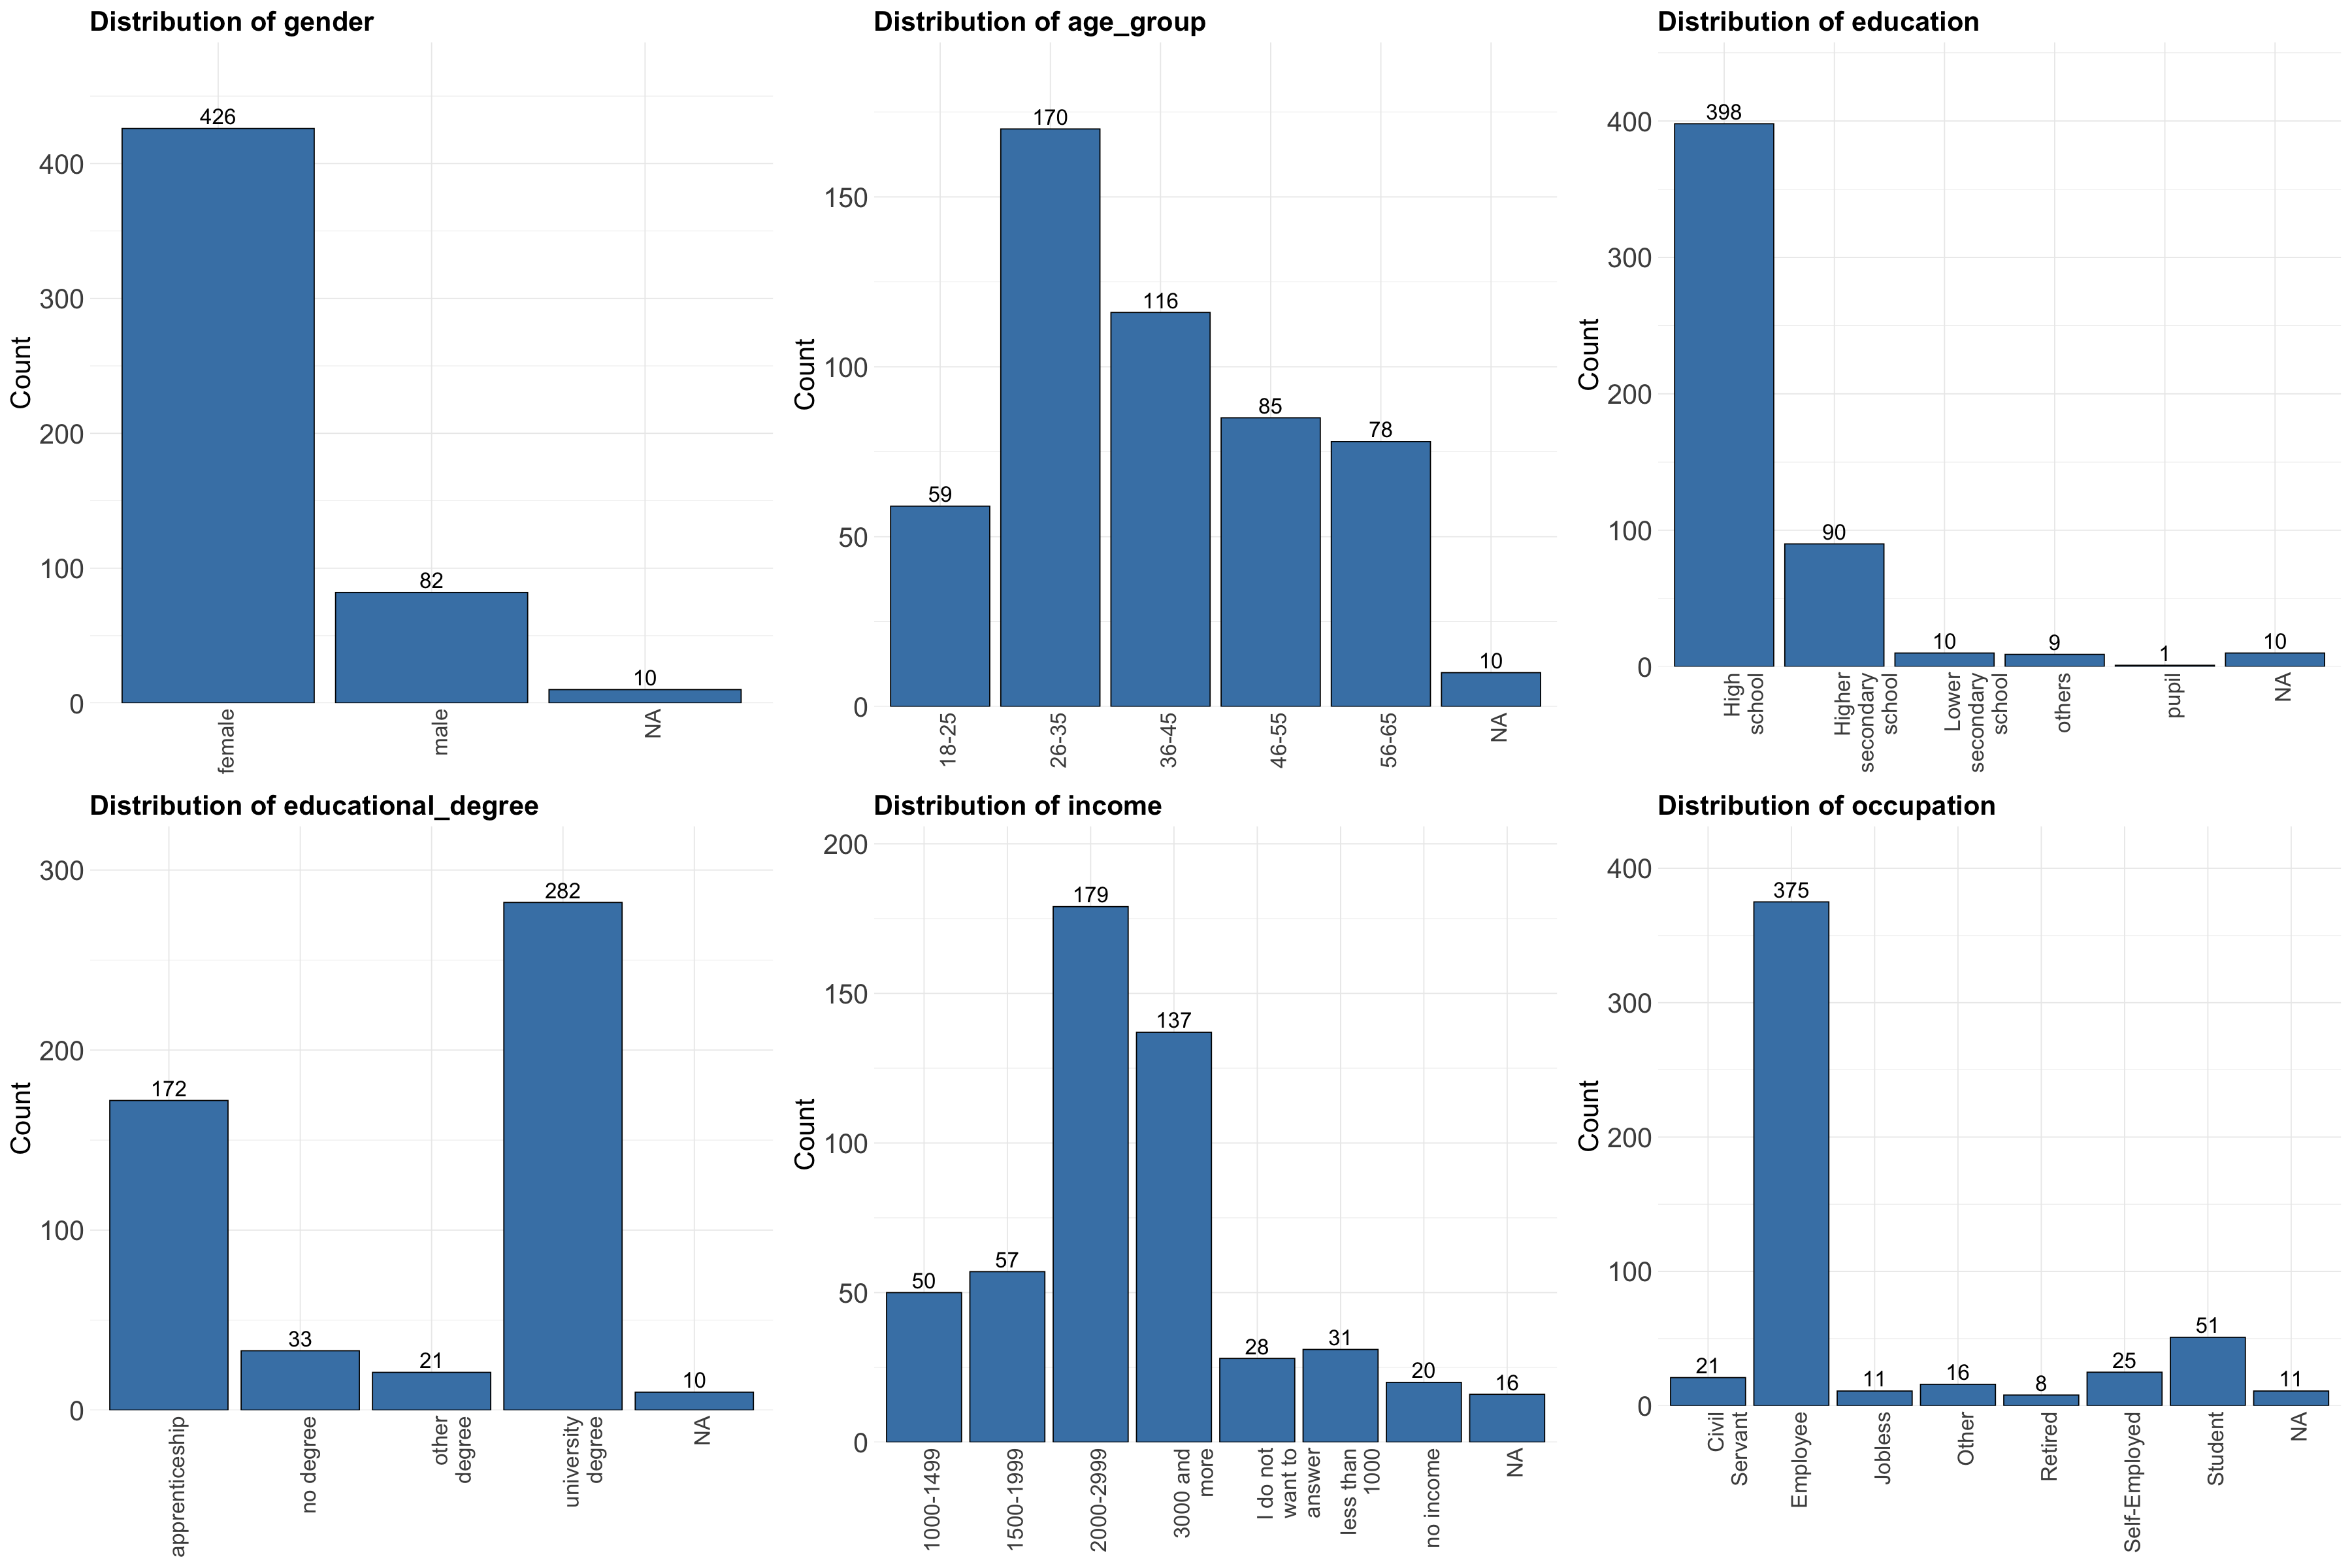

In [48]:
# Create individual plots and store them in a list with adjusted label positions
plots <- lapply(sociodemographic_vars, function(var) {
  ggplot(socio_data, aes(x = .data[[var]])) +
    geom_bar(fill = "steelblue", color = "black") +
    geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.3, size = 7) +  # Place counts just above bars
    theme_minimal() +
    labs(title = paste("Distribution of", var), x = NULL, y = "Count") +  # Suppress x-axis label
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +  # Wrap x-axis labels
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  # Extend y-axis to leave space for counts
    theme(
      axis.text.x = element_text(angle = 90, hjust = 1, size = 20),  # Adjust x-axis text angle and size
      axis.text.y = element_text(size = 25),  # Adjust y-axis text size
      axis.title.y = element_text(size = 25),  # Adjust y-axis label size
      plot.title = element_text(size = 25, face = "bold"),
      plot.margin = margin(10, 10, 10, 10)  # Add spacing around each plot
    )
})

# Arrange plots in a 3-row, 3-column grid
grid.arrange(grobs = plots, nrow = 2, ncol = 3)

In [50]:
# Increase the width and height of the plot
options(repr.plot.width = 30, repr.plot.height = 7)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

In [51]:
# ------------------------
# FILTER STRESSOR DATA
# ------------------------
stressor_vars <- c("stressor_minors_0to6", "stressor_minor_7to13", "stressor_minor_14above",
                   "stressor_minor_handicapped", "stressor_adult_handicapped", "stressor_shifting_shifts",
                   "stressor_night_shift", "stressor_weekend_work", "stressor_seated_work",
                   "stressor_seated_stood_work", "stressor_physical_work")

In [62]:
# Convert wide format to long format
stress_data_long <- mind %>%
    dplyr::select(all_of(stressor_vars)) %>%
    pivot_longer(cols = everything(), names_to = "stressor", values_to = "response") %>%
    filter(response == "chosen")  # Keep only chosen stressors


In [65]:
# Count occurrences of each stressor
stressor_counts <- stress_data_long %>%
    dplyr::count(stressor, name = "count") %>%
    mutate(stressor = str_replace(stressor, "stressor_", ""))  # Remove 'stressor_' prefix

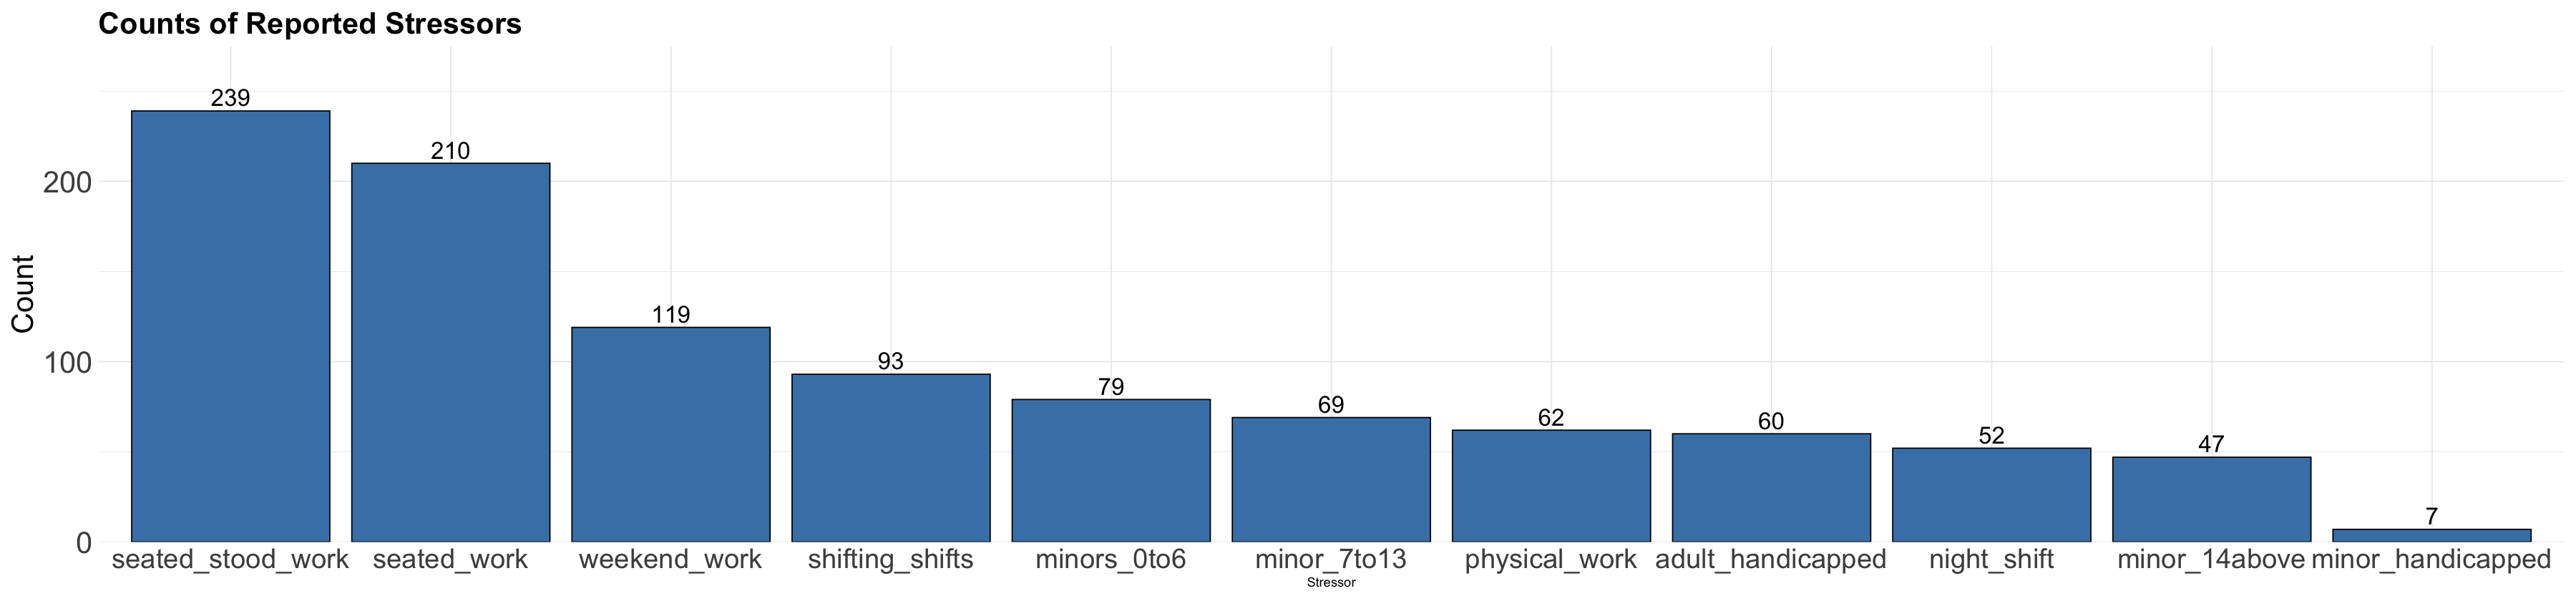

In [69]:
# ------------------------
# CREATE BAR CHART
# ------------------------
ggplot(stressor_counts, aes(x = reorder(stressor, -count), y = count)) +
    geom_bar(stat = "identity", fill = "steelblue", color = "black") +
    geom_text(aes(label = count), vjust = -0.3, size = 7) +  # Place counts above bars
    theme_minimal() +
    labs(title = "Counts of Reported Stressors", x = "Stressor", y = "Count") +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 15)) +  # Wrap labels into multiple rows
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  # Add space above bars
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 23),  # 0-degree angle, centered
        axis.text.y = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        plot.title = element_text(size = 25, face = "bold"),
        plot.margin = margin(10, 10, 10, 10)
    )

In [70]:
colnames(mind)

[1] "Serial_Nr"                           "Quest_Nr"                           
 [3] "time_started"                        "questions_ended"                    
 [5] "viewer"                              "where_did_the_viewer_ended"         
 [7] "where_did_the_participant_ended"     "proportion_missing_answers"         
 [9] "proportion_missing_answers_weighted" "answering_speed"                    
[11] "my_group"                            "gender"                             
[13] "age_group"                           "education"                          
[15] "educational_degree"                  "income"                             
[17] "stressor_minors_0to6"                "stressor_minor_7to13"               
[19] "stressor_minor_14above"              "stressor_minor_handicapped"         
[21] "stressor_adult_handicapped"          "stressor_shifting_shifts"           
[23] "stressor_night_shift"                "stressor_weekend_work"              
[25] "stressor_seated_work"                "stressor_seated_stood_work"         
[27] "stressor_physical_work"              "relaxation_pmr"                     
[29] "relaxation_aroma"                    "relaxation_yoga"                    
[31] "relaxation_meditation"               "relaxation_massagen"                
[33] "relaxation_sport"                    "relaxation_hypnosis"                
[35] "relaxation_at"                       "relaxation_breathing"               
[37] "relaxation_rest"                     "pre_mood"                           
[39] "pre_emotions"                        "post_mood"                          
[41] "post_emotions"                       "aroma_received"                     
[43] "aroma_tested"                        "occupation"                         
[45] "MDBF_GS"                             "MDBF_WM"                            
[47] "MDBF_RU"                             "MDBF"                               
[49] "pss_helplessness"                    "pss_self_efficacy"                  
[51] "pss_total"                           "who5_total"

In [71]:
# ------------------------
# FILTER RELAXATION DATA
# ------------------------
relaxation_vars <- c("relaxation_pmr", "relaxation_aroma", "relaxation_yoga",
                     "relaxation_meditation", "relaxation_massagen", "relaxation_sport",
                     "relaxation_hypnosis", "relaxation_at", "relaxation_breathing", "relaxation_rest")


In [72]:
# Convert wide format to long format
relaxation_data_long <- mind %>%
    dplyr::select(all_of(relaxation_vars)) %>%
    pivot_longer(cols = everything(), names_to = "relaxation", values_to = "response") %>%
    filter(response == "chosen")  # Keep only chosen relaxation techniques


In [73]:
# Count occurrences of each relaxation technique
relaxation_counts <- relaxation_data_long %>%
    dplyr::count(relaxation, name = "count") %>%
    mutate(relaxation = str_replace(relaxation, "relaxation_", ""))  # Remove 'relaxation_' prefix


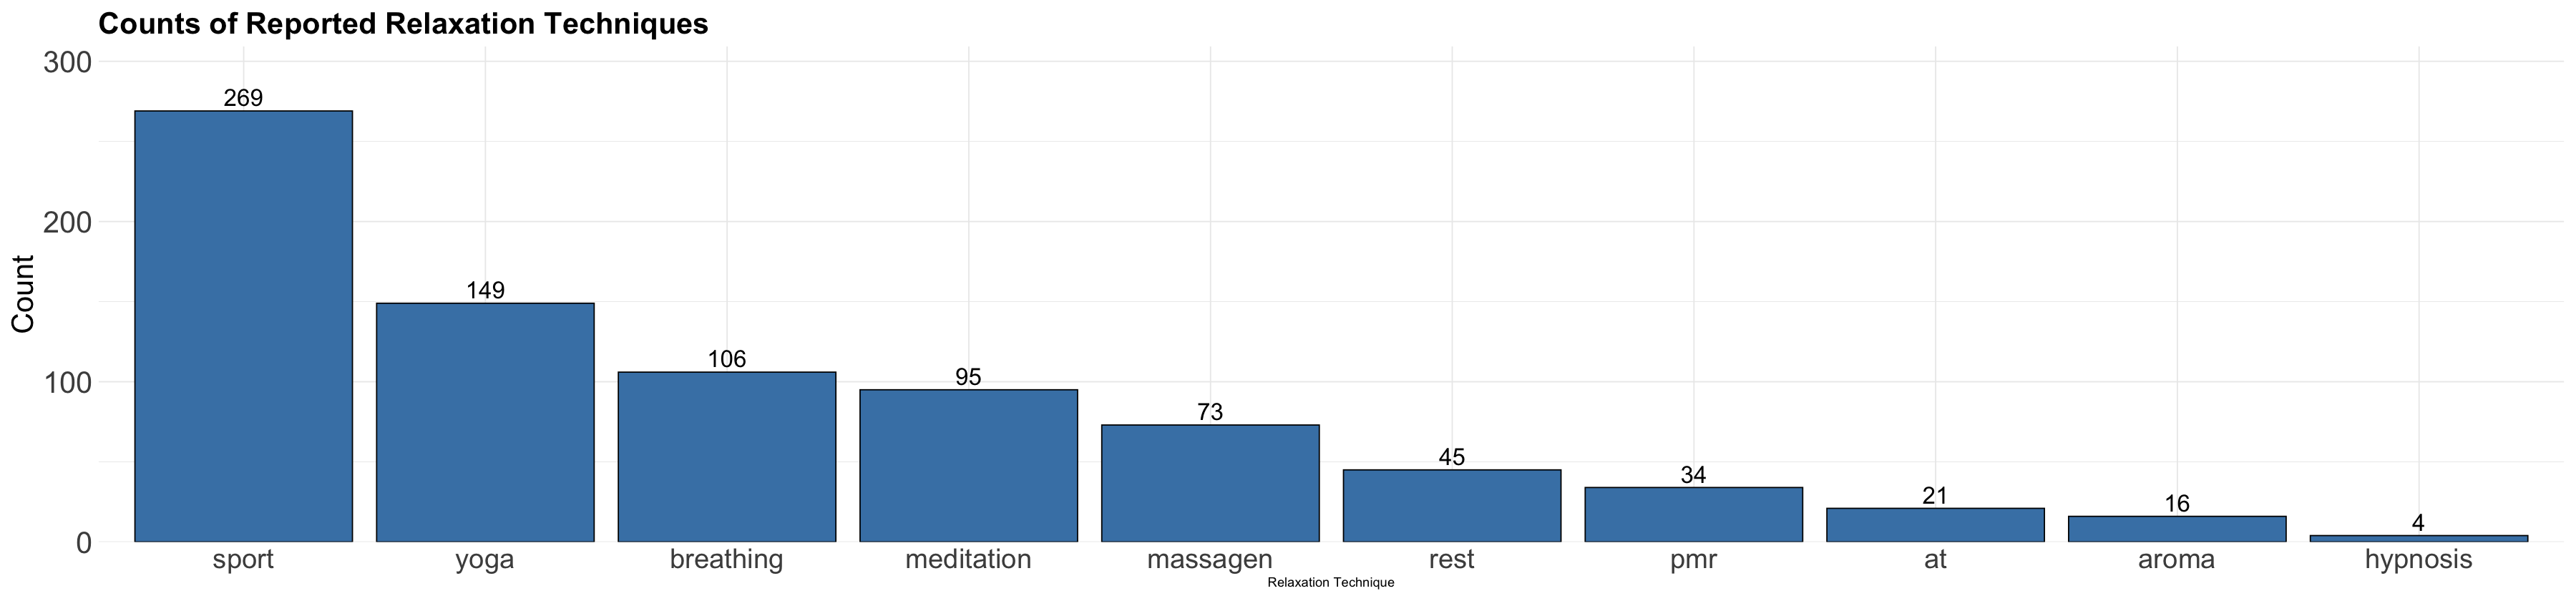

In [74]:
# ------------------------
# CREATE BAR CHART
# ------------------------
ggplot(relaxation_counts, aes(x = reorder(relaxation, -count), y = count)) +
    geom_bar(stat = "identity", fill = "steelblue", color = "black") +
    geom_text(aes(label = count), vjust = -0.3, size = 7) +  # Place counts above bars
    theme_minimal() +
    labs(title = "Counts of Reported Relaxation Techniques", x = "Relaxation Technique", y = "Count") +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 15)) +  # Wrap labels into multiple rows
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  # Add space above bars
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 23),  # 0-degree angle, centered
        axis.text.y = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        plot.title = element_text(size = 25, face = "bold"),
        plot.margin = margin(10, 10, 10, 10)
    )

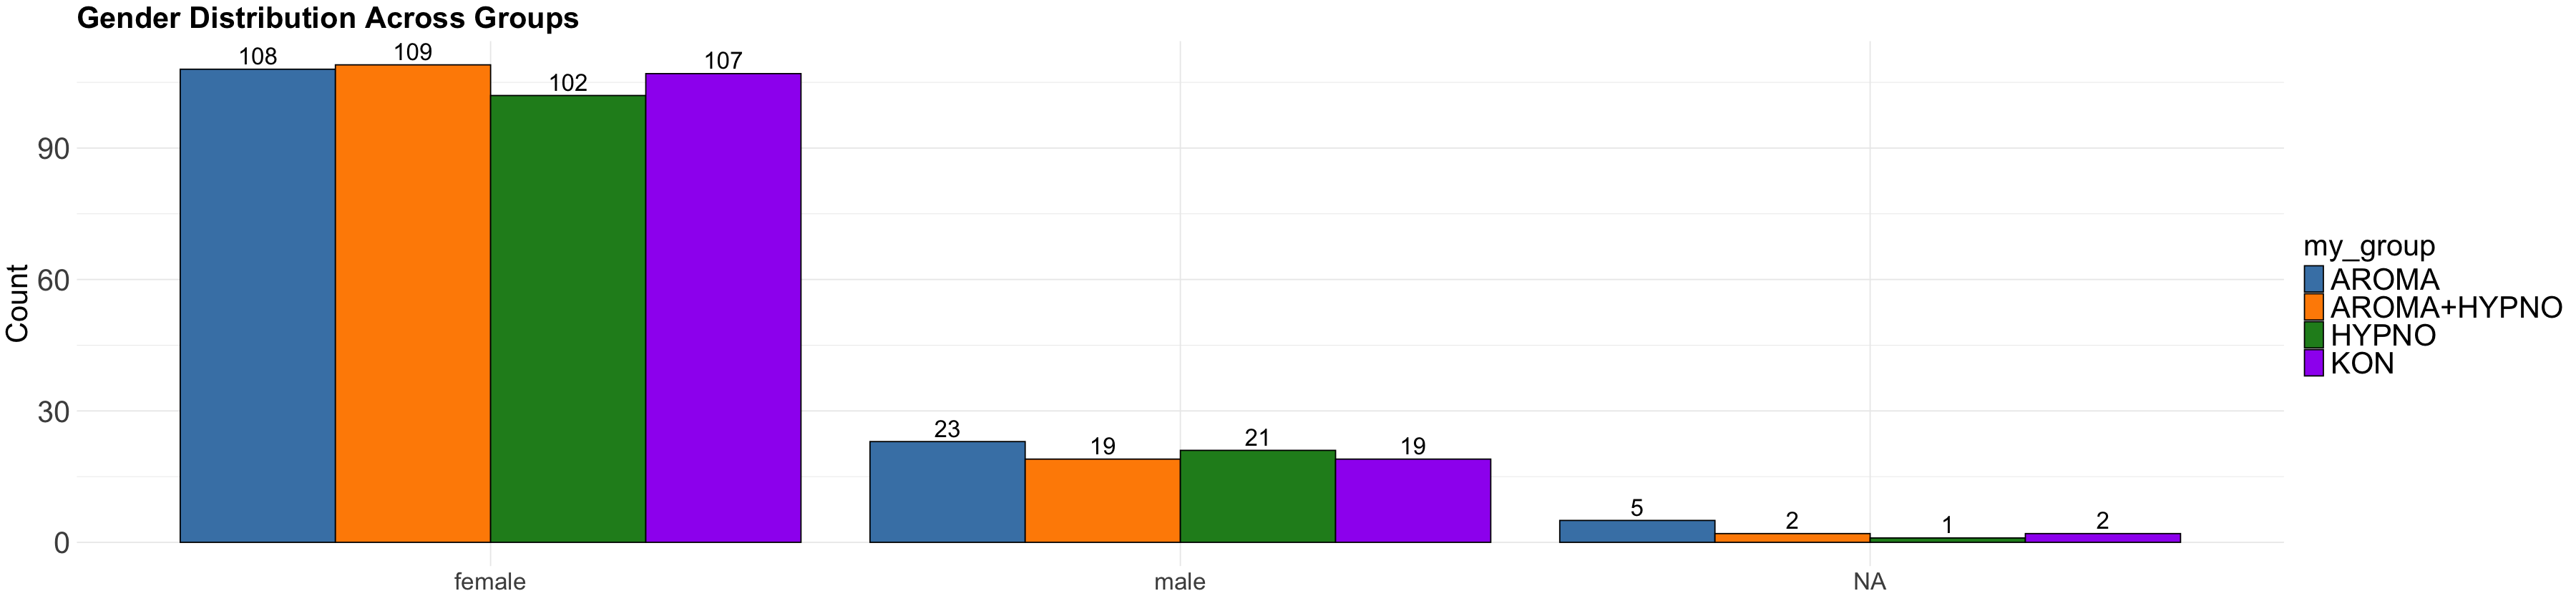

In [75]:
# Create the grouped bar plot for gender distribution across `my_group`
ggplot(socio_data, aes(x = gender, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Gender Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

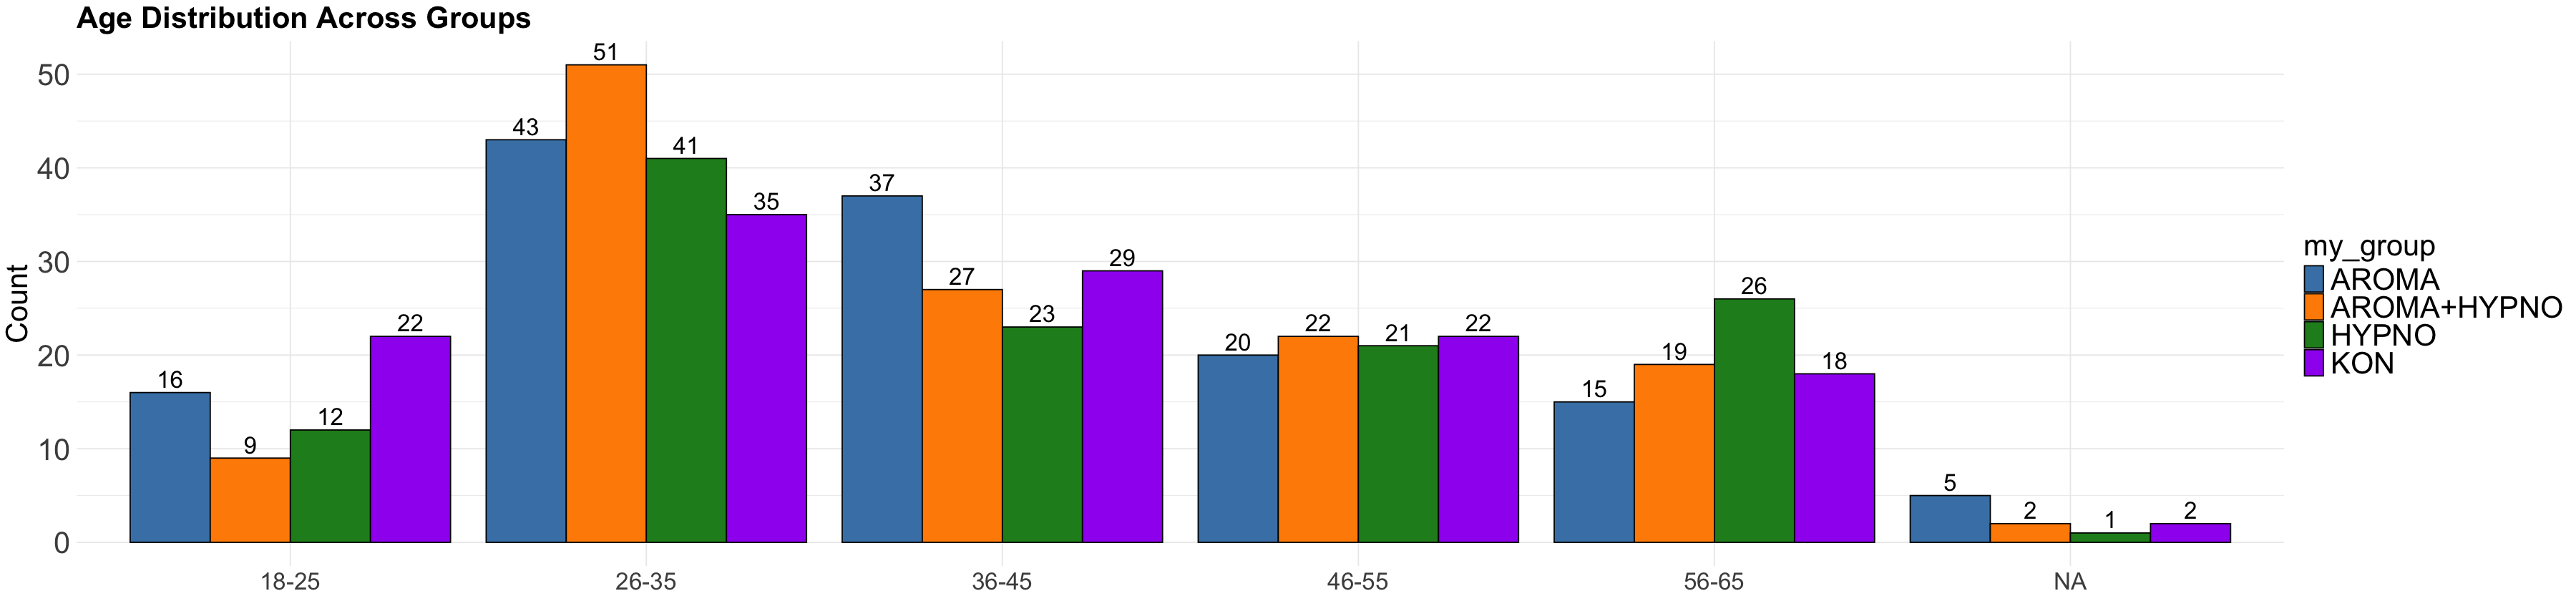

In [76]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = age_group, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Age Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

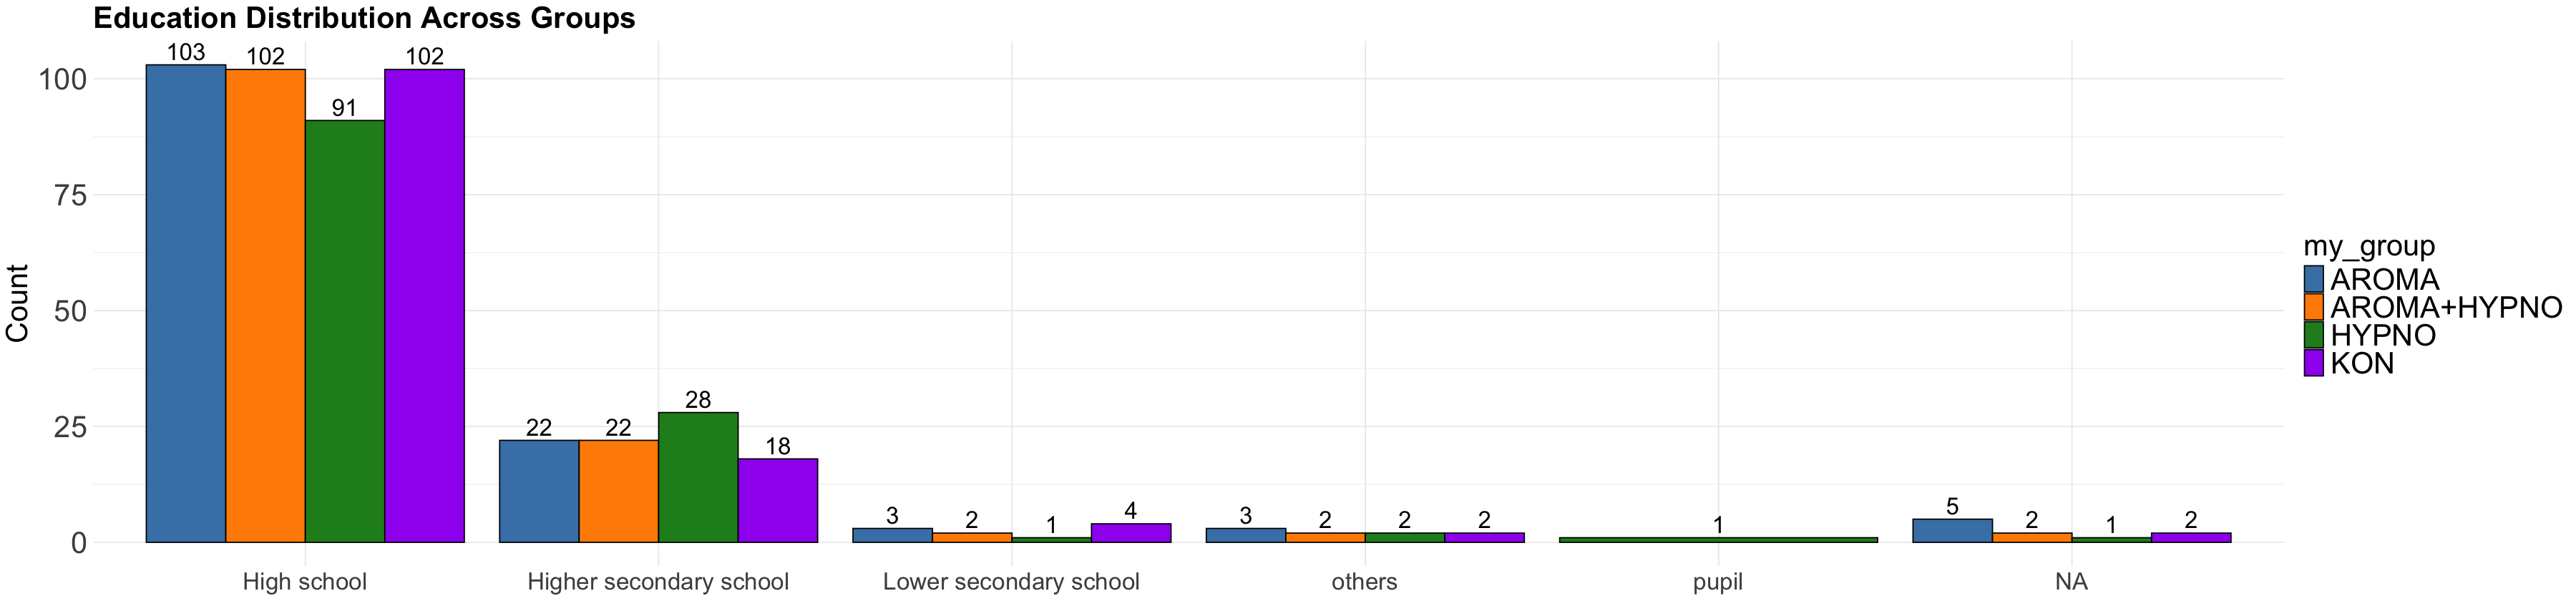

In [77]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = education, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Education Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

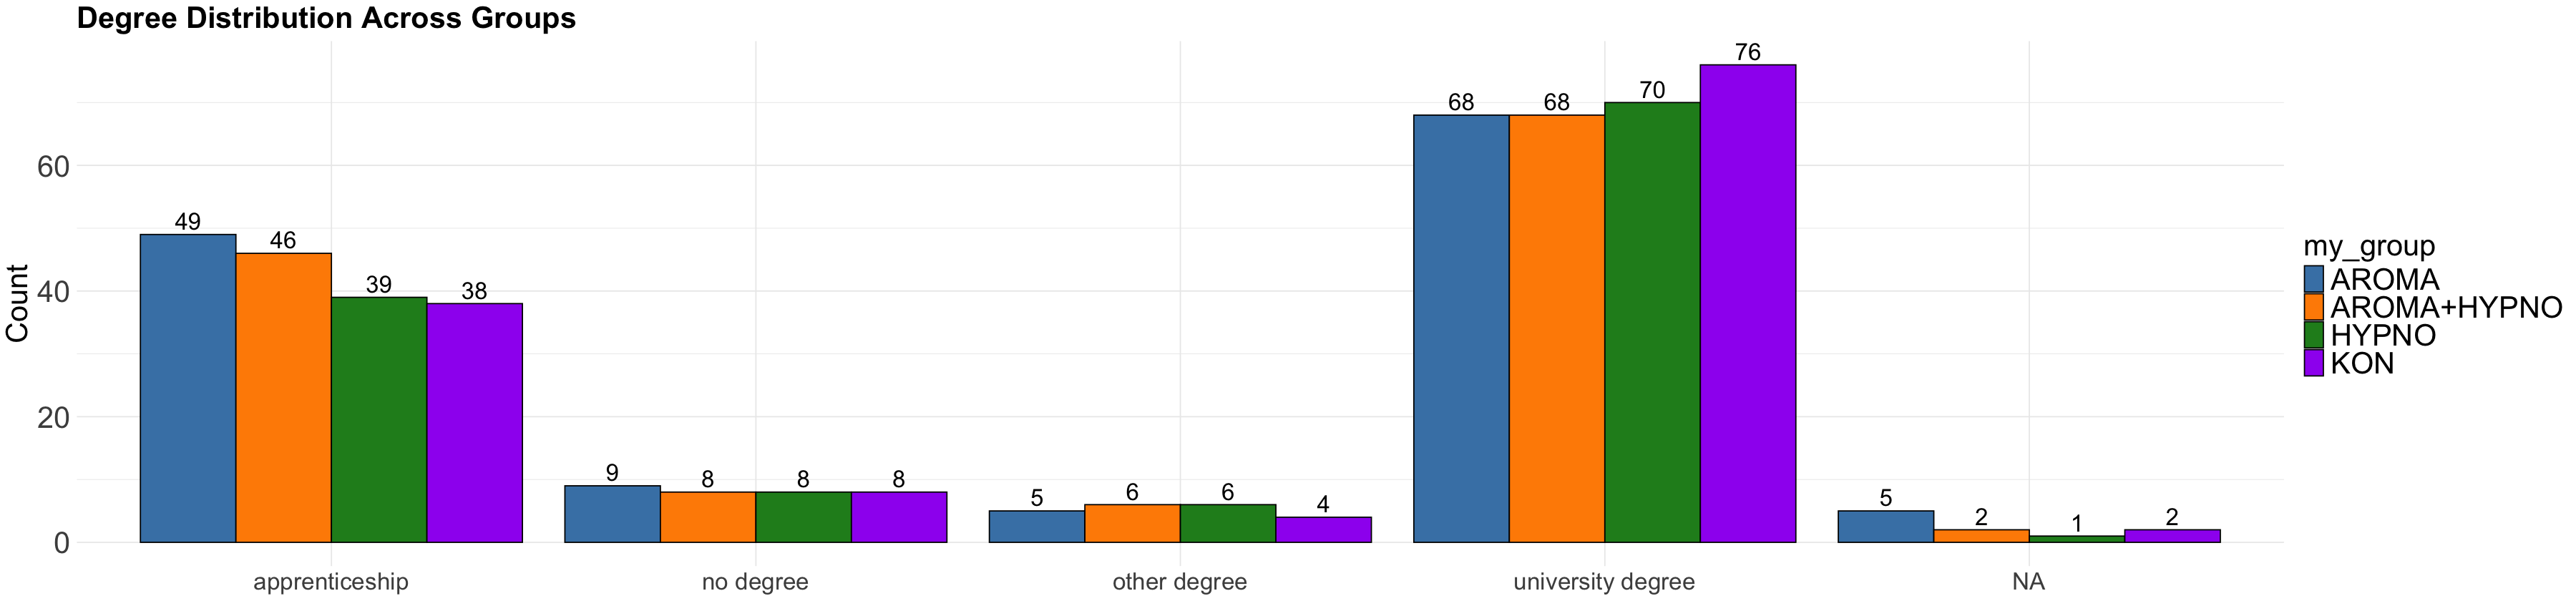

In [78]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = educational_degree, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Degree Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

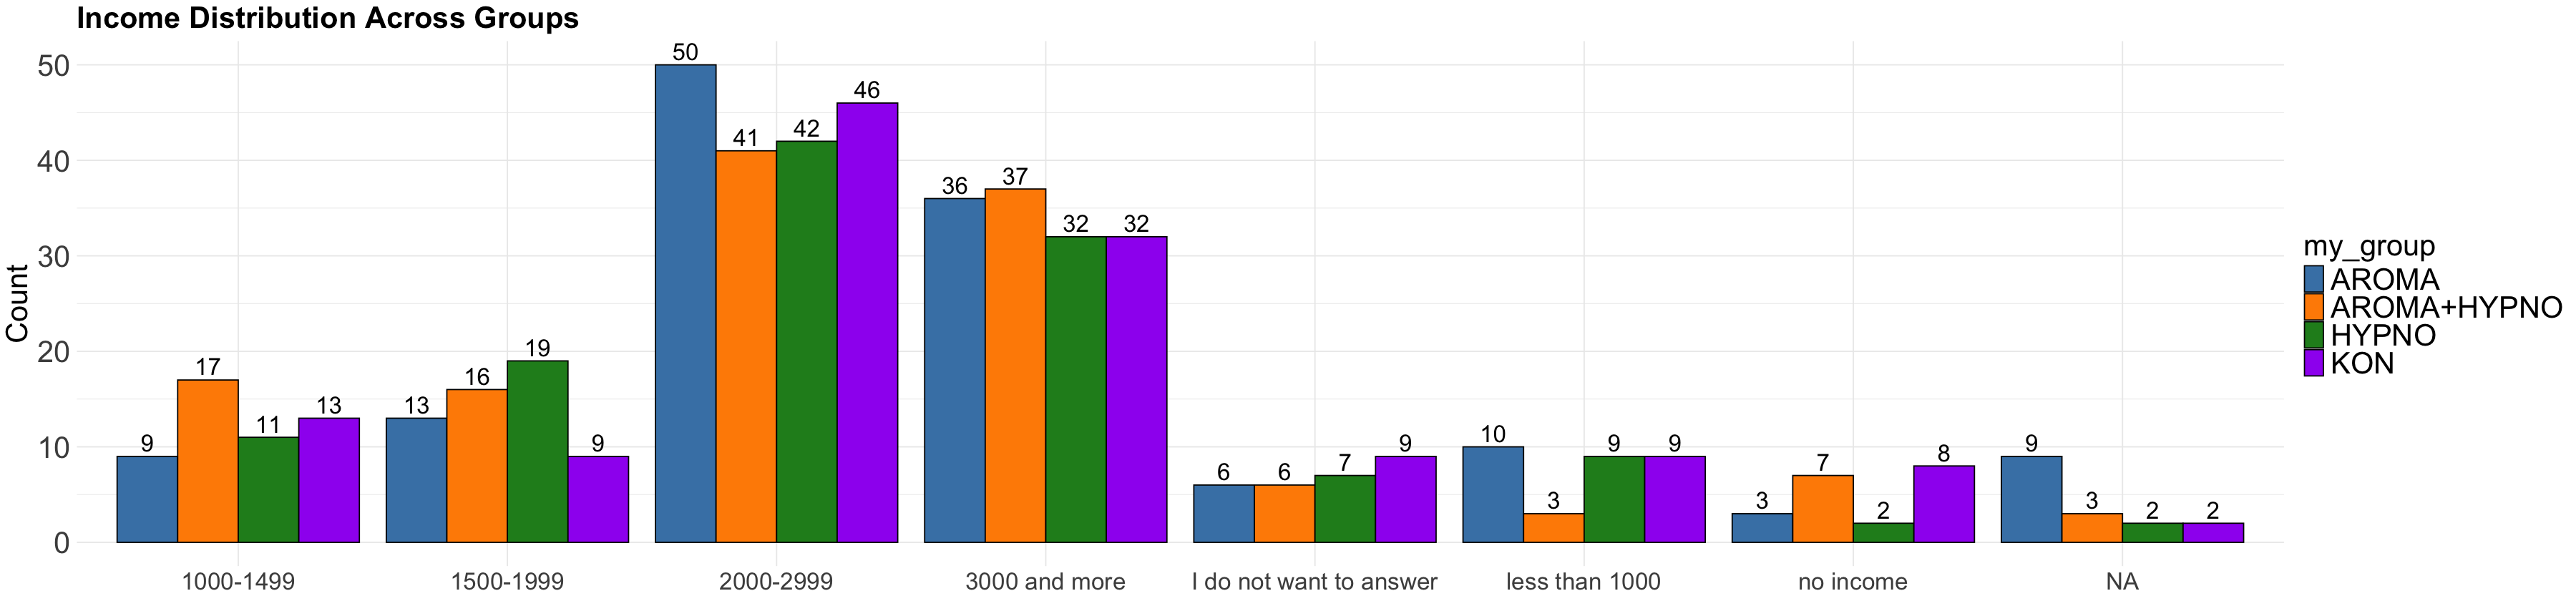

In [79]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = income, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Income Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

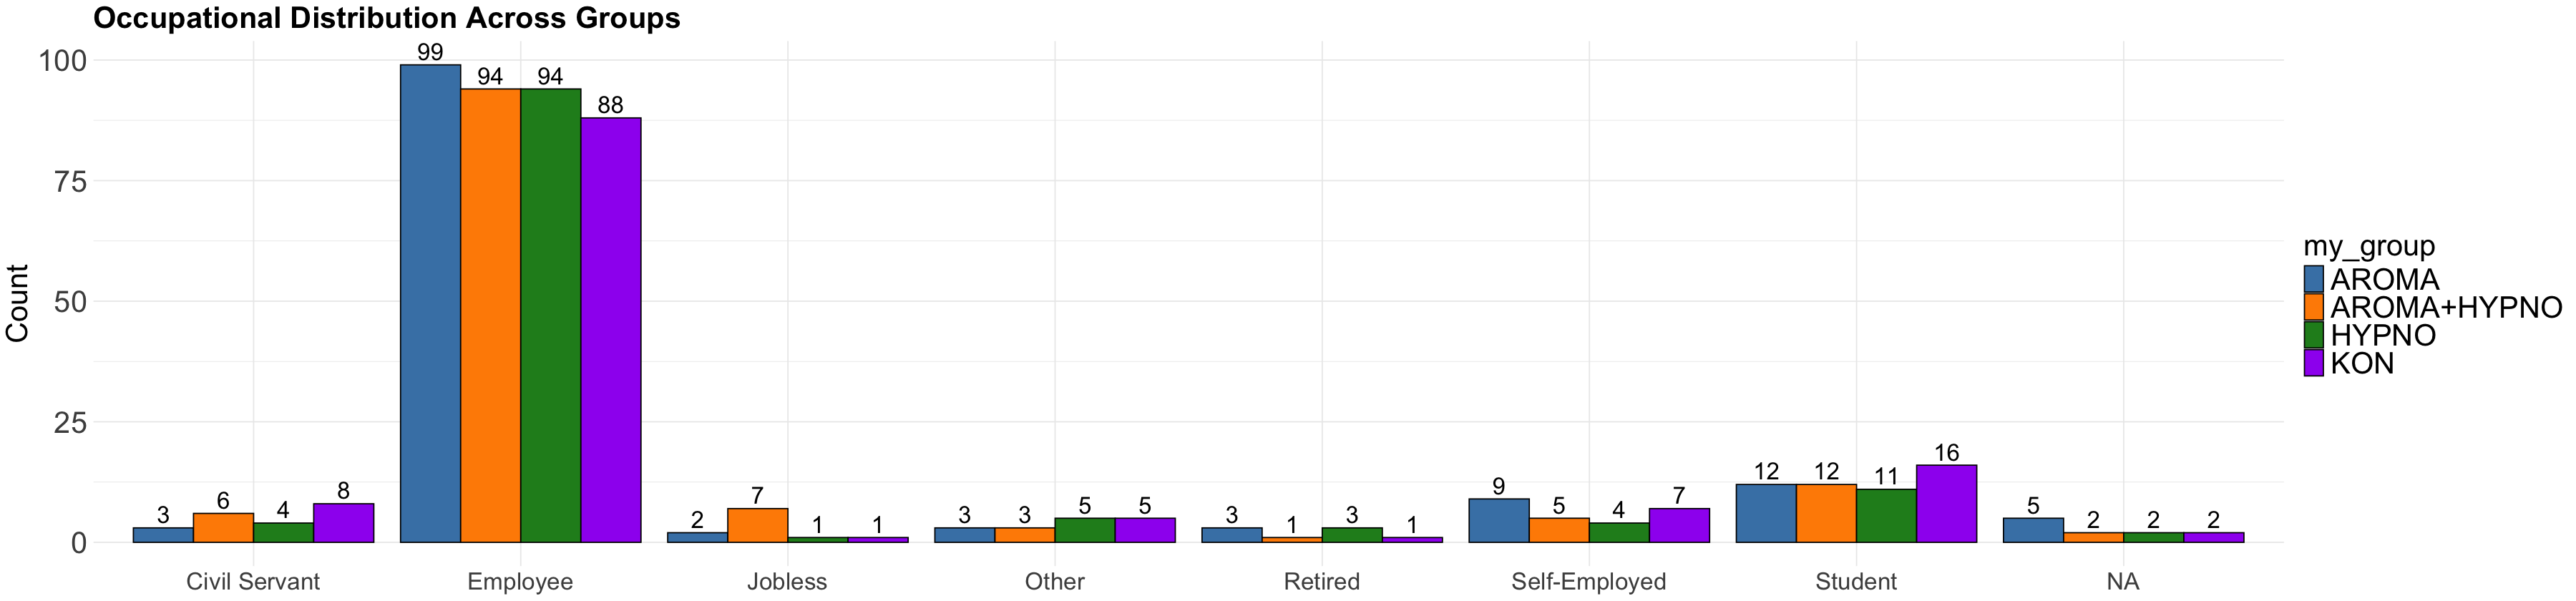

In [80]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = occupation, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Occupational Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

In [81]:
# Convert wide format to long format, keeping "my_group"
stress_data_long <- mind %>%
    dplyr::select(my_group, all_of(stressor_vars)) %>%
    pivot_longer(cols = -my_group, names_to = "stressor", values_to = "response") %>%
    filter(response == "chosen")  # Keep only chosen stressors

In [82]:
# Count occurrences of each stressor per group
stressor_counts <- stress_data_long %>%
    dplyr::count(stressor, my_group, name = "count") %>%
    mutate(stressor = str_replace(stressor, "stressor_", ""))  # Remove 'stressor_' prefix


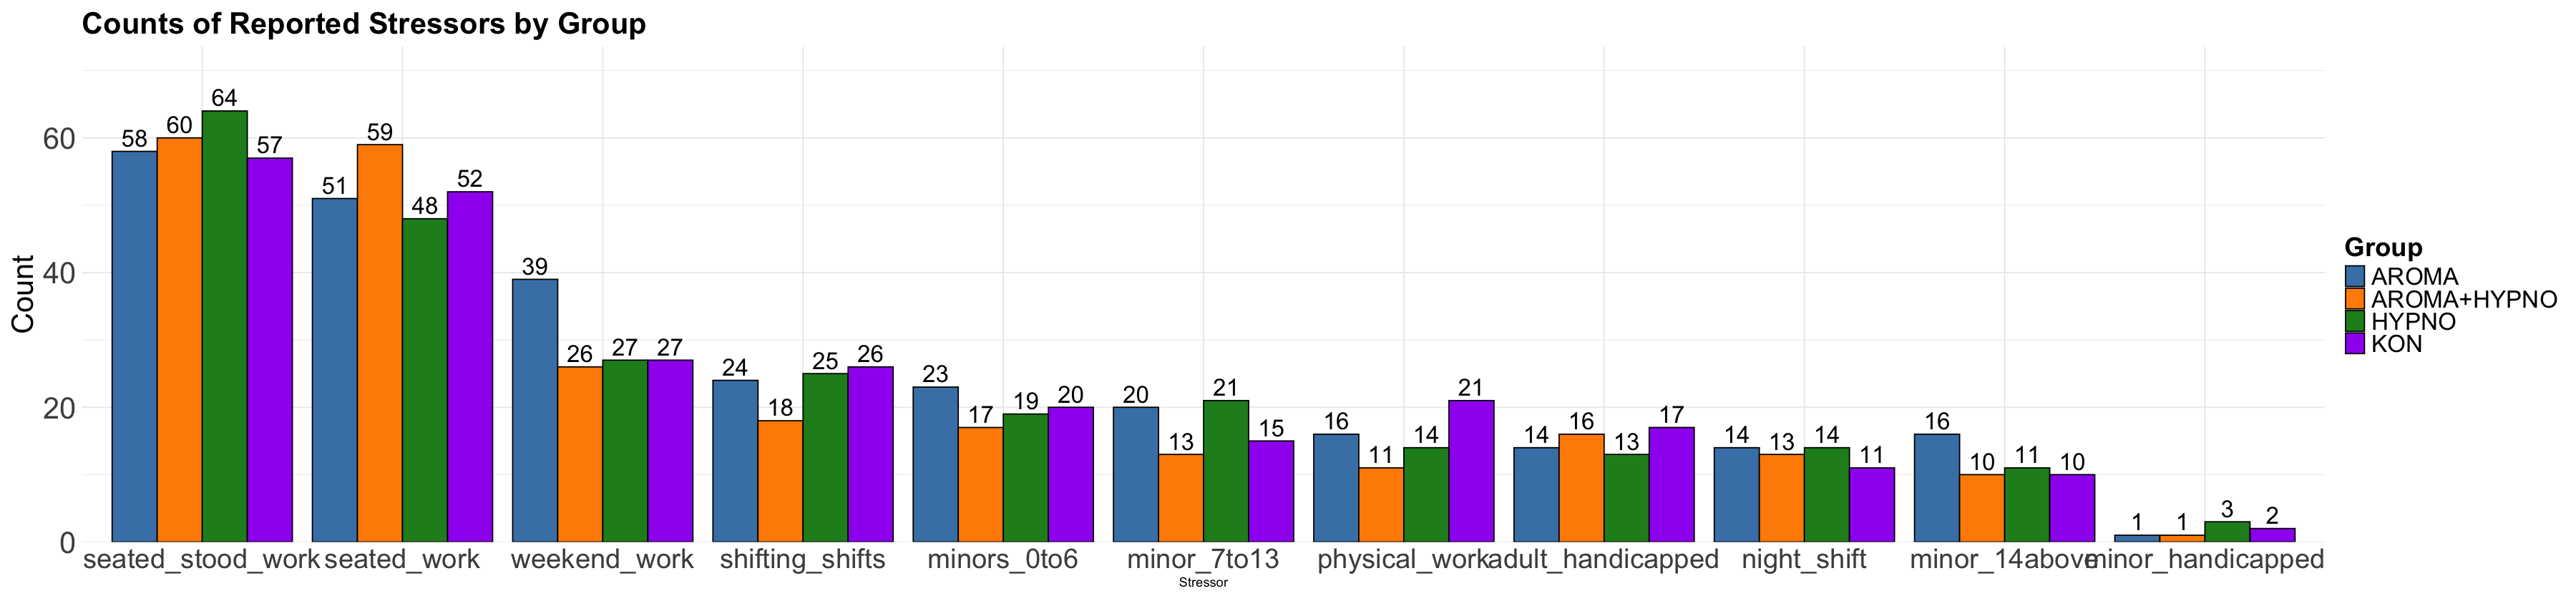

In [83]:
# ------------------------
# CREATE GROUPED BAR CHART
# ------------------------
ggplot(stressor_counts, aes(x = reorder(stressor, -count), y = count, fill = my_group)) +
    geom_bar(stat = "identity", position = "dodge", color = "black") +
    geom_text(aes(label = count), position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  
    theme_minimal() +
    labs(title = "Counts of Reported Stressors by Group", x = "Stressor", y = "Count", fill = "Group") +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 15)) +  
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  
    scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                                 "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 23),
        axis.text.y = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        plot.title = element_text(size = 25, face = "bold"),
        plot.margin = margin(10, 10, 10, 10),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 22, face = "bold")
    )

In [84]:
# Convert wide format to long format, keeping "my_group"
relaxation_data_long <- mind %>%
    dplyr::select(my_group, all_of(relaxation_vars)) %>%
    pivot_longer(cols = -my_group, names_to = "relaxation", values_to = "response") %>%
    filter(response == "chosen")  # Keep only chosen relaxation techniques


In [85]:
# Count occurrences of each relaxation technique per group
relaxation_counts <- relaxation_data_long %>%
    dplyr::count(relaxation, my_group, name = "count") %>%
    mutate(relaxation = str_replace(relaxation, "relaxation_", ""))  # Remove 'relaxation_' prefix


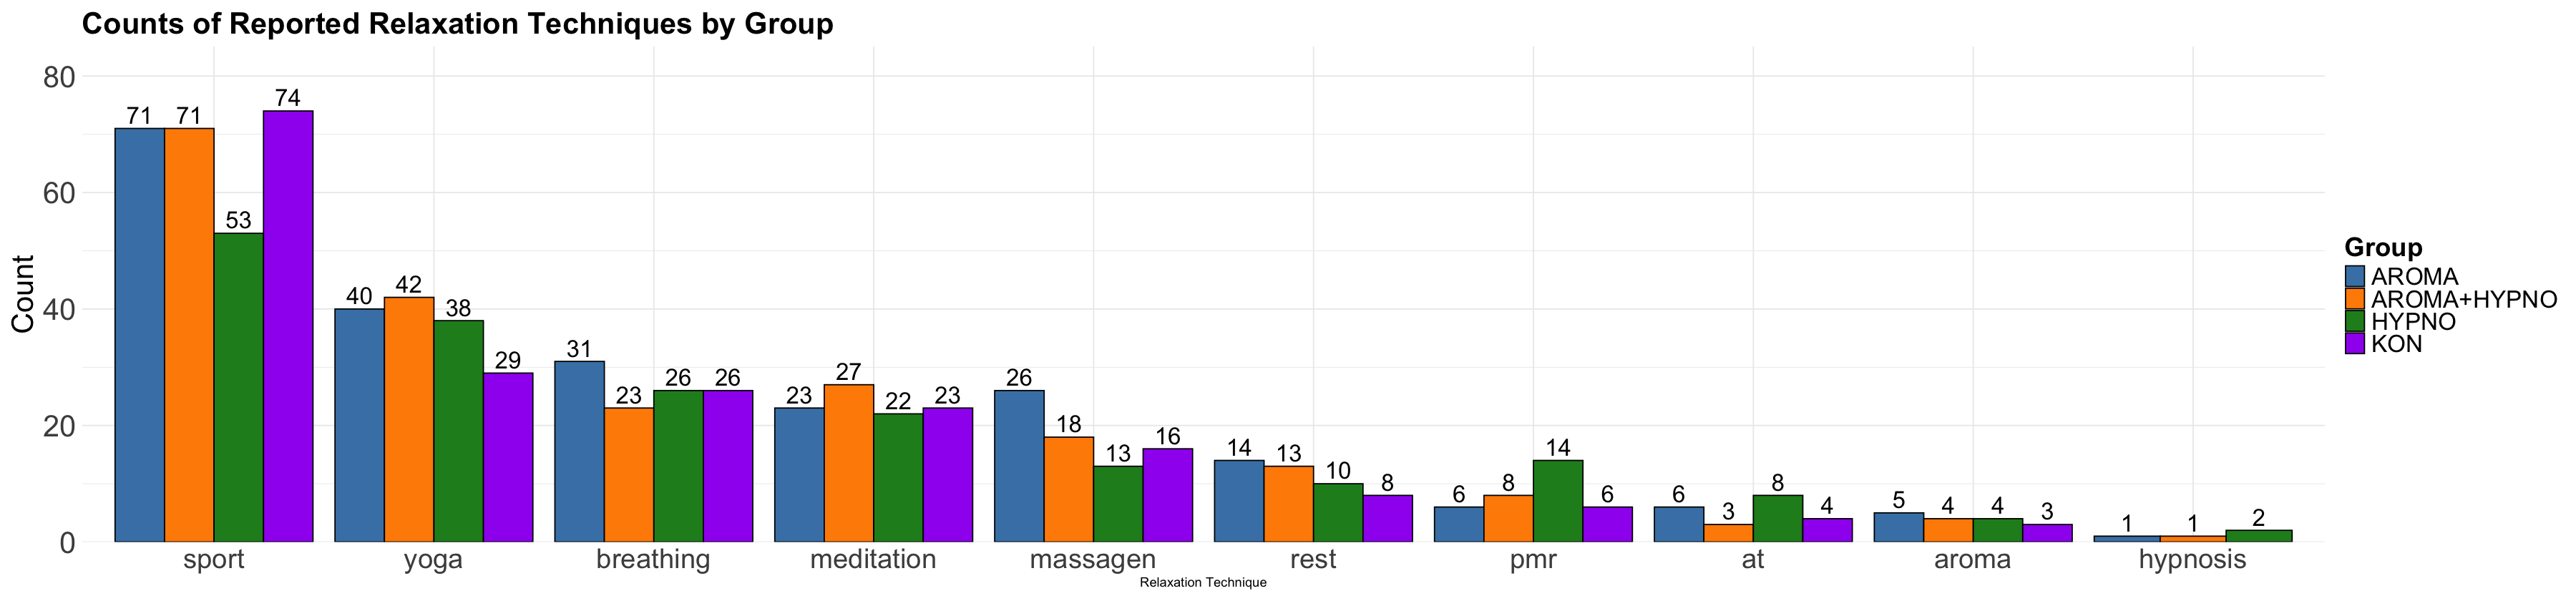

In [86]:
# ------------------------
# CREATE GROUPED BAR CHART
# ------------------------
ggplot(relaxation_counts, aes(x = reorder(relaxation, -count), y = count, fill = my_group)) +
    geom_bar(stat = "identity", position = "dodge", color = "black") +
    geom_text(aes(label = count), position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  
    theme_minimal() +
    labs(title = "Counts of Reported Relaxation Techniques by Group", x = "Relaxation Technique", y = "Count", fill = "Group") +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 15)) +  
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  
    scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                                 "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 23),
        axis.text.y = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        plot.title = element_text(size = 25, face = "bold"),
        plot.margin = margin(10, 10, 10, 10),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 22, face = "bold")
    )

In [87]:
# Total number of participants per group
total_per_group <- socio_data %>%
  filter(my_group != "ADMIN") %>%
  group_by(my_group) %>%
  dplyr::summarise(total_n = n(), .groups = "drop")

print("Total number of participants per group:")
print(total_per_group)

[1] "Total number of participants per group:"
# A tibble: 4 x 2
  my_group    total_n
  <fct>         <int>
1 AROMA           136
2 AROMA+HYPNO     130
3 HYPNO           124
4 KON             128


In [88]:
# Compute gender distribution with correct percentages
gender_per_group <- socio_data %>%
  group_by(my_group, gender) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, gender, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Gender Distribution Per Group:")
print(gender_per_group, n = Inf)  # Print all rows

[1] "Gender Distribution Per Group:"
# A tibble: 12 x 4
   my_group    gender     n percent
   <fct>       <fct>  <int>   <dbl>
 1 AROMA       female   108  79.4  
 2 AROMA       male      23  16.9  
 3 AROMA       NA         5   3.68 
 4 AROMA+HYPNO female   109  83.8  
 5 AROMA+HYPNO male      19  14.6  
 6 AROMA+HYPNO NA         2   1.54 
 7 HYPNO       female   102  82.3  
 8 HYPNO       male      21  16.9  
 9 HYPNO       NA         1   0.806
10 KON         female   107  83.6  
11 KON         male      19  14.8  
12 KON         NA         2   1.56 


In [89]:
# Age group per group
age_per_group <- socio_data %>%
  group_by(my_group, age_group) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, age_group, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Age Distribution Per Group:")
print(age_per_group, n = Inf)  # Print all rows

[1] "Age Distribution Per Group:"
# A tibble: 24 x 4
   my_group    age_group     n percent
   <fct>       <fct>     <int>   <dbl>
 1 AROMA       18-25        16  11.8  
 2 AROMA       26-35        43  31.6  
 3 AROMA       36-45        37  27.2  
 4 AROMA       46-55        20  14.7  
 5 AROMA       56-65        15  11.0  
 6 AROMA       NA            5   3.68 
 7 AROMA+HYPNO 18-25         9   6.92 
 8 AROMA+HYPNO 26-35        51  39.2  
 9 AROMA+HYPNO 36-45        27  20.8  
10 AROMA+HYPNO 46-55        22  16.9  
11 AROMA+HYPNO 56-65        19  14.6  
12 AROMA+HYPNO NA            2   1.54 
13 HYPNO       18-25        12   9.68 
14 HYPNO       26-35        41  33.1  
15 HYPNO       36-45        23  18.5  
16 HYPNO       46-55        21  16.9  
17 HYPNO       56-65        26  21.0  
18 HYPNO       NA            1   0.806
19 KON         18-25        22  17.2  
20 KON         26-35        35  27.3  
21 KON         36-45        29  22.7  
22 KON         46-55        22  17.2  
23 KON     

In [90]:
# Age group per group
education_per_group <- socio_data %>%
  group_by(my_group, education) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, education, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Education Distribution Per Group:")
print(education_per_group, n = Inf)  # Print all rows

[1] "Education Distribution Per Group:"
# A tibble: 21 x 4
   my_group    education                   n percent
   <fct>       <fct>                   <int>   <dbl>
 1 AROMA       High school               103  75.7  
 2 AROMA       Higher secondary school    22  16.2  
 3 AROMA       Lower secondary school      3   2.21 
 4 AROMA       others                      3   2.21 
 5 AROMA       NA                          5   3.68 
 6 AROMA+HYPNO High school               102  78.5  
 7 AROMA+HYPNO Higher secondary school    22  16.9  
 8 AROMA+HYPNO Lower secondary school      2   1.54 
 9 AROMA+HYPNO others                      2   1.54 
10 AROMA+HYPNO NA                          2   1.54 
11 HYPNO       High school                91  73.4  
12 HYPNO       Higher secondary school    28  22.6  
13 HYPNO       Lower secondary school      1   0.806
14 HYPNO       others                      2   1.61 
15 HYPNO       pupil                       1   0.806
16 HYPNO       NA                       

In [91]:
# Educational_degree group per group
education_degree_per_group <- socio_data %>%
  group_by(my_group, educational_degree) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, educational_degree, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Educational Degree Distribution Per Group:")
print(education_degree_per_group, n = Inf)  # Print all rows

[1] "Educational Degree Distribution Per Group:"
# A tibble: 20 x 4
   my_group    educational_degree     n percent
   <fct>       <fct>              <int>   <dbl>
 1 AROMA       apprenticeship        49  36.0  
 2 AROMA       no degree              9   6.62 
 3 AROMA       other degree           5   3.68 
 4 AROMA       university degree     68  50    
 5 AROMA       NA                     5   3.68 
 6 AROMA+HYPNO apprenticeship        46  35.4  
 7 AROMA+HYPNO no degree              8   6.15 
 8 AROMA+HYPNO other degree           6   4.62 
 9 AROMA+HYPNO university degree     68  52.3  
10 AROMA+HYPNO NA                     2   1.54 
11 HYPNO       apprenticeship        39  31.5  
12 HYPNO       no degree              8   6.45 
13 HYPNO       other degree           6   4.84 
14 HYPNO       university degree     70  56.5  
15 HYPNO       NA                     1   0.806
16 KON         apprenticeship        38  29.7  
17 KON         no degree              8   6.25 
18 KON         other

In [92]:
# Income group per group
income_per_group <- socio_data %>%
  group_by(my_group, income) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, income, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Income Distribution Per Group:")
print(income_per_group, n = Inf)  # Print all rows

[1] "Income Distribution Per Group:"
# A tibble: 32 x 4
   my_group    income                      n percent
   <fct>       <fct>                   <int>   <dbl>
 1 AROMA       1000-1499                   9    6.62
 2 AROMA       1500-1999                  13    9.56
 3 AROMA       2000-2999                  50   36.8 
 4 AROMA       3000 and more              36   26.5 
 5 AROMA       I do not want to answer     6    4.41
 6 AROMA       less than 1000             10    7.35
 7 AROMA       no income                   3    2.21
 8 AROMA       NA                          9    6.62
 9 AROMA+HYPNO 1000-1499                  17   13.1 
10 AROMA+HYPNO 1500-1999                  16   12.3 
11 AROMA+HYPNO 2000-2999                  41   31.5 
12 AROMA+HYPNO 3000 and more              37   28.5 
13 AROMA+HYPNO I do not want to answer     6    4.62
14 AROMA+HYPNO less than 1000              3    2.31
15 AROMA+HYPNO no income                   7    5.38
16 AROMA+HYPNO NA                          

In [93]:
# Occupation group per group
occupation_per_group <- socio_data %>%
  group_by(my_group, occupation) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, occupation, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Occupation Distribution Per Group:")
print(occupation_per_group, n = Inf)  # Print all rows

[1] "Occupation Distribution Per Group:"
# A tibble: 32 x 4
   my_group    occupation        n percent
   <fct>       <fct>         <int>   <dbl>
 1 AROMA       Civil Servant     3   2.21 
 2 AROMA       Employee         99  72.8  
 3 AROMA       Jobless           2   1.47 
 4 AROMA       Other             3   2.21 
 5 AROMA       Retired           3   2.21 
 6 AROMA       Self-Employed     9   6.62 
 7 AROMA       Student          12   8.82 
 8 AROMA       NA                5   3.68 
 9 AROMA+HYPNO Civil Servant     6   4.62 
10 AROMA+HYPNO Employee         94  72.3  
11 AROMA+HYPNO Jobless           7   5.38 
12 AROMA+HYPNO Other             3   2.31 
13 AROMA+HYPNO Retired           1   0.769
14 AROMA+HYPNO Self-Employed     5   3.85 
15 AROMA+HYPNO Student          12   9.23 
16 AROMA+HYPNO NA                2   1.54 
17 HYPNO       Civil Servant     4   3.23 
18 HYPNO       Employee         94  75.8  
19 HYPNO       Jobless           1   0.806
20 HYPNO       Other             5   

In [94]:
# ------------------------
# CALCULATE STRESSOR DISTRIBUTION PER GROUP
# ------------------------

# Get total count per group for percentage calculation
total_per_group <- stress_data_long %>%
    group_by(my_group) %>%
    dplyr::summarise(total_n = n(), .groups = "drop")

In [95]:
# Count occurrences of each stressor per group
stressors_per_group <- stress_data_long %>%
    group_by(my_group, stressor) %>%
    dplyr::summarise(n = n(), .groups = "drop") %>%
    left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
    mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
    dplyr::select(my_group, stressor, n, percent)  # Keep only relevant columns


In [96]:
# Print the correctly calculated table
print("Stressor Distribution Per Group:")
print(stressors_per_group, n = Inf)  # Print all rows

[1] "Stressor Distribution Per Group:"
# A tibble: 44 x 4
   my_group    stressor                       n percent
   <fct>       <chr>                      <int>   <dbl>
 1 AROMA       stressor_adult_handicapped    14   5.07 
 2 AROMA       stressor_minor_14above        16   5.80 
 3 AROMA       stressor_minor_7to13          20   7.25 
 4 AROMA       stressor_minor_handicapped     1   0.362
 5 AROMA       stressor_minors_0to6          23   8.33 
 6 AROMA       stressor_night_shift          14   5.07 
 7 AROMA       stressor_physical_work        16   5.80 
 8 AROMA       stressor_seated_stood_work    58  21.0  
 9 AROMA       stressor_seated_work          51  18.5  
10 AROMA       stressor_shifting_shifts      24   8.70 
11 AROMA       stressor_weekend_work         39  14.1  
12 AROMA+HYPNO stressor_adult_handicapped    16   6.56 
13 AROMA+HYPNO stressor_minor_14above        10   4.10 
14 AROMA+HYPNO stressor_minor_7to13          13   5.33 
15 AROMA+HYPNO stressor_minor_handicapped     

In [98]:
# ------------------------
# CALCULATE RELAXATION DISTRIBUTION PER GROUP
# ------------------------

# Get total count per group for percentage calculation
total_per_group <- relaxation_data_long %>%
    group_by(my_group) %>%
    dplyr::summarise(total_n = n(), .groups = "drop")

In [99]:
# Count occurrences of each relaxation method per group
relaxation_per_group <- relaxation_data_long %>%
    group_by(my_group, relaxation) %>%
    dplyr::summarise(n = n(), .groups = "drop") %>%
    left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
    mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
    dplyr::select(my_group, relaxation, n, percent)  # Keep only relevant columns


In [100]:
# Print the correctly calculated table
print("Relaxation Distribution Per Group:")
print(relaxation_per_group, n = Inf)  # Print all rows

[1] "Relaxation Distribution Per Group:"
# A tibble: 39 x 4
   my_group    relaxation                n percent
   <fct>       <chr>                 <int>   <dbl>
 1 AROMA       relaxation_aroma          5   2.24 
 2 AROMA       relaxation_at             6   2.69 
 3 AROMA       relaxation_breathing     31  13.9  
 4 AROMA       relaxation_hypnosis       1   0.448
 5 AROMA       relaxation_massagen      26  11.7  
 6 AROMA       relaxation_meditation    23  10.3  
 7 AROMA       relaxation_pmr            6   2.69 
 8 AROMA       relaxation_rest          14   6.28 
 9 AROMA       relaxation_sport         71  31.8  
10 AROMA       relaxation_yoga          40  17.9  
11 AROMA+HYPNO relaxation_aroma          4   1.90 
12 AROMA+HYPNO relaxation_at             3   1.43 
13 AROMA+HYPNO relaxation_breathing     23  11.0  
14 AROMA+HYPNO relaxation_hypnosis       1   0.476
15 AROMA+HYPNO relaxation_massagen      18   8.57 
16 AROMA+HYPNO relaxation_meditation    27  12.9  
17 AROMA+HYPNO relaxat

In [101]:
# Filter out ADMIN and keep only relevant time points
filtered_data <- mind %>%
  filter(my_group %in% c("AROMA", "AROMA+HYPNO", "HYPNO", "KON") & 
         Quest_Nr %in% c("V0", "V1", "V2", "V3W5"))

# Define outcome variables
outcome_vars <- c("MDBF_GS", "MDBF_WM", "MDBF_RU", "MDBF", 
                  "pss_helplessness", "pss_self_efficacy", "pss_total", "who5_total")


In [102]:
# Increase the width and height of the plot
options(repr.plot.width = 30, repr.plot.height = 7)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

In [103]:
# Function to create a boxplot for a single outcome variable
plot_single_boxplot <- function(var) {
  filtered_data %>%
    filter(!is.na(.data[[var]])) %>%  # Exclude missing values
    ggplot(aes(x = Quest_Nr, y = .data[[var]], fill = my_group)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.6) +  # Boxplot without outliers
    geom_jitter(aes(color = my_group), size = 1.5, position = position_jitterdodge(jitter.width = 0.2), alpha = 0.5) +  # Proper jitter
    theme_minimal() +
    labs(title = paste("Distribution of", var, "Across Time Points"),
         x = "Time Point",
         y = var,  # Use the variable name for the y-axis label
         fill = "Group") +
    scale_x_discrete(limits = c("V0", "V1", "V2", "V3W5")) +  # Ensure correct time point order
    theme(
      axis.text.x = element_text(size = 25),  # Increase x-axis text size
      axis.text.y = element_text(size = 25),  # Increase y-axis text size
      axis.title.x = element_text(size = 25),  # Increase x-axis label size
      axis.title.y = element_text(size = 25),  # Increase y-axis label size
      plot.title = element_text(size = 26, face = "bold"),
      legend.title = element_text(size = 20),
      legend.text = element_text(size = 18)
    )
}

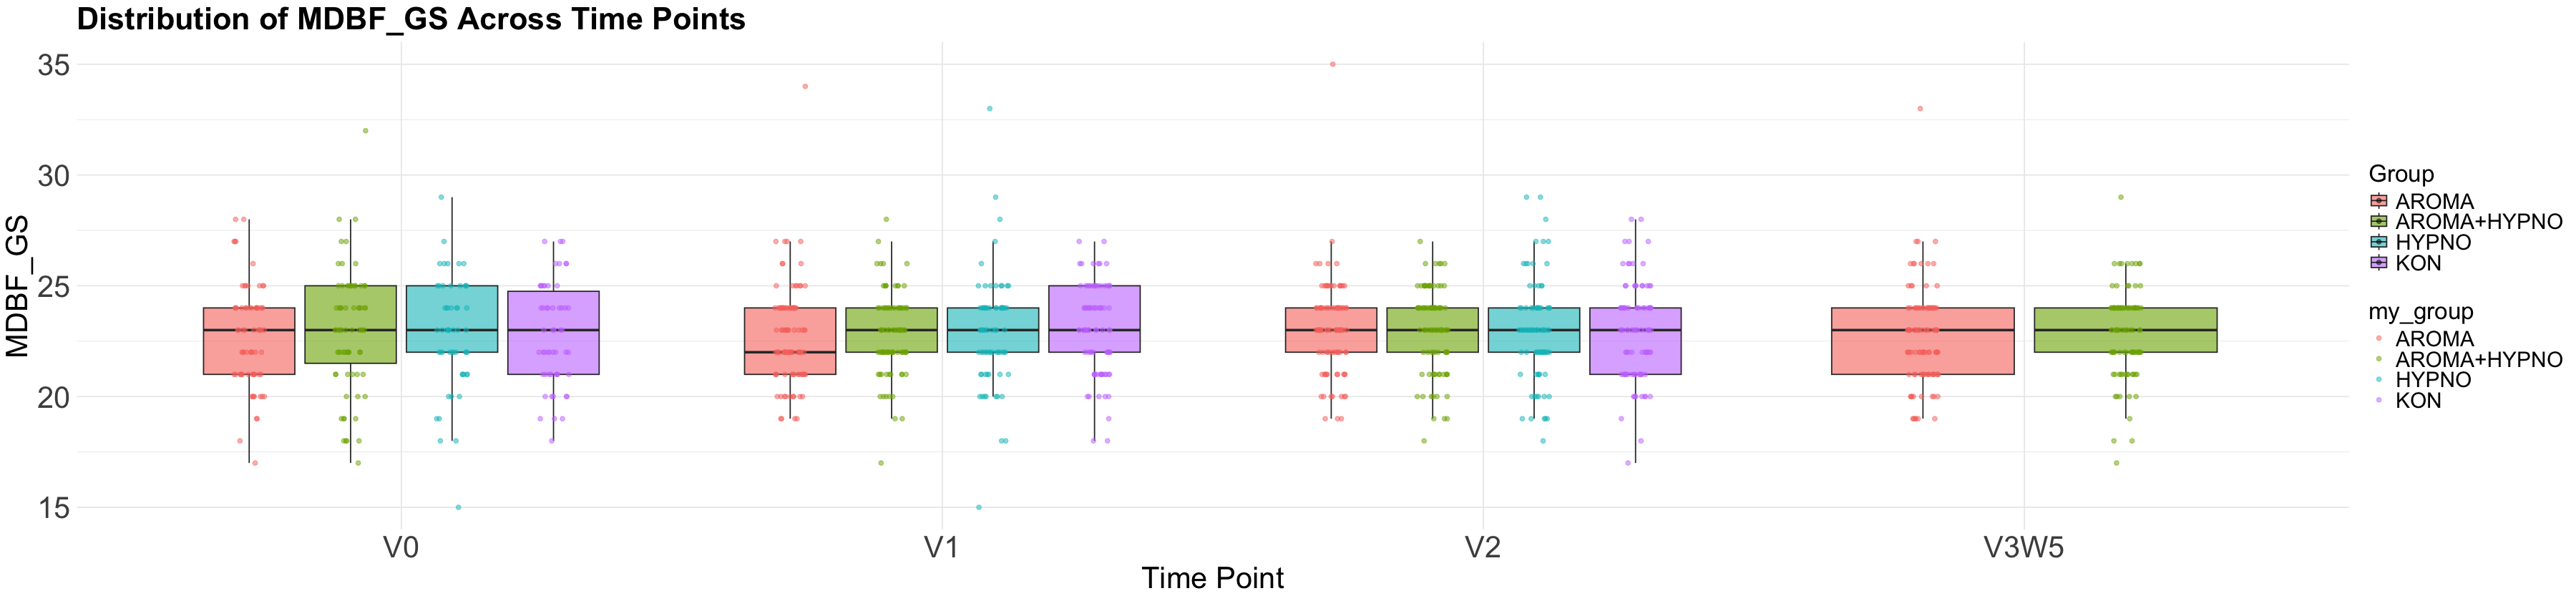

In [104]:
# Plotting one outcome variable at a time
plot_single_boxplot("MDBF_GS")

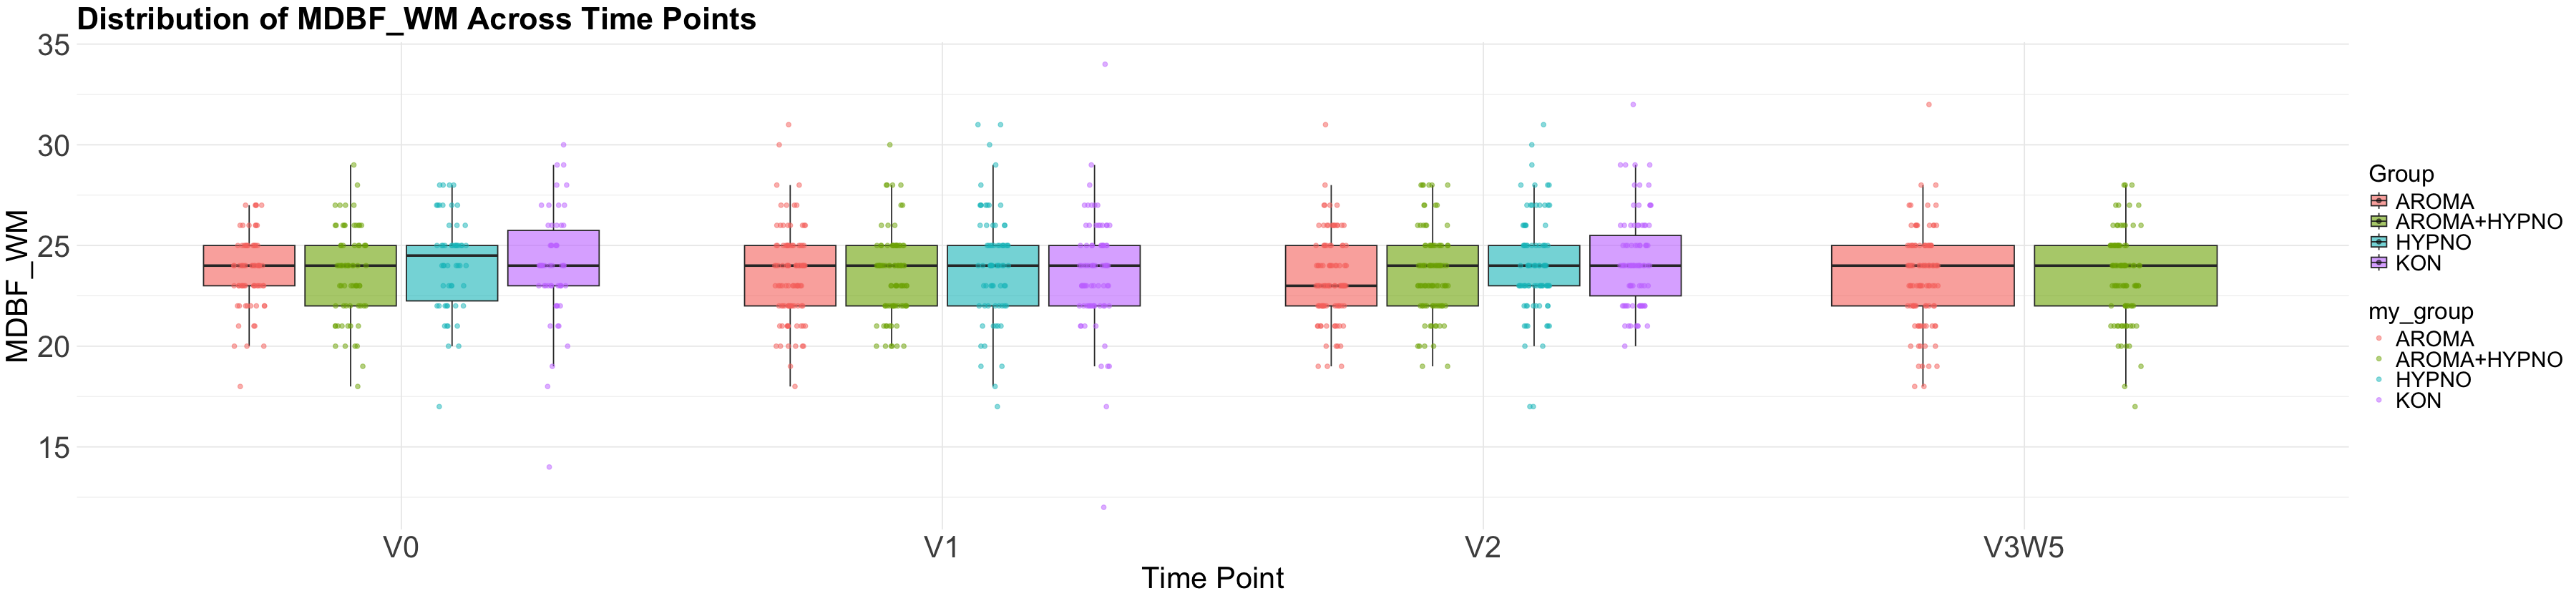

In [105]:
# Plotting one outcome variable at a time
plot_single_boxplot("MDBF_WM")

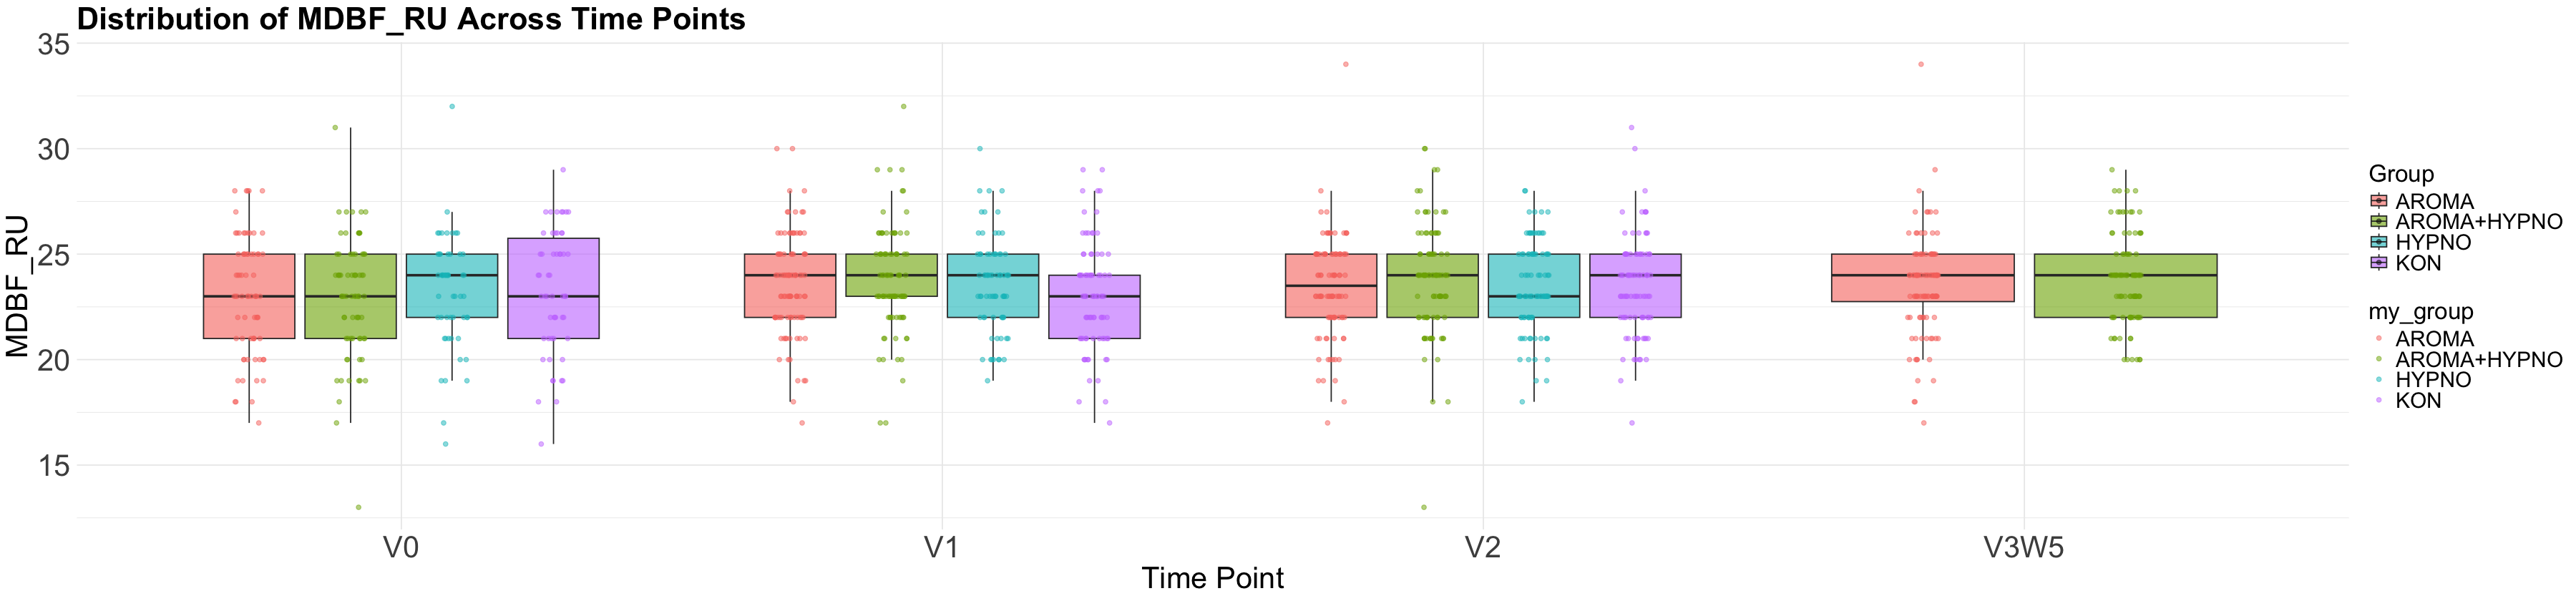

In [106]:
# Plotting one outcome variable at a time
plot_single_boxplot("MDBF_RU")

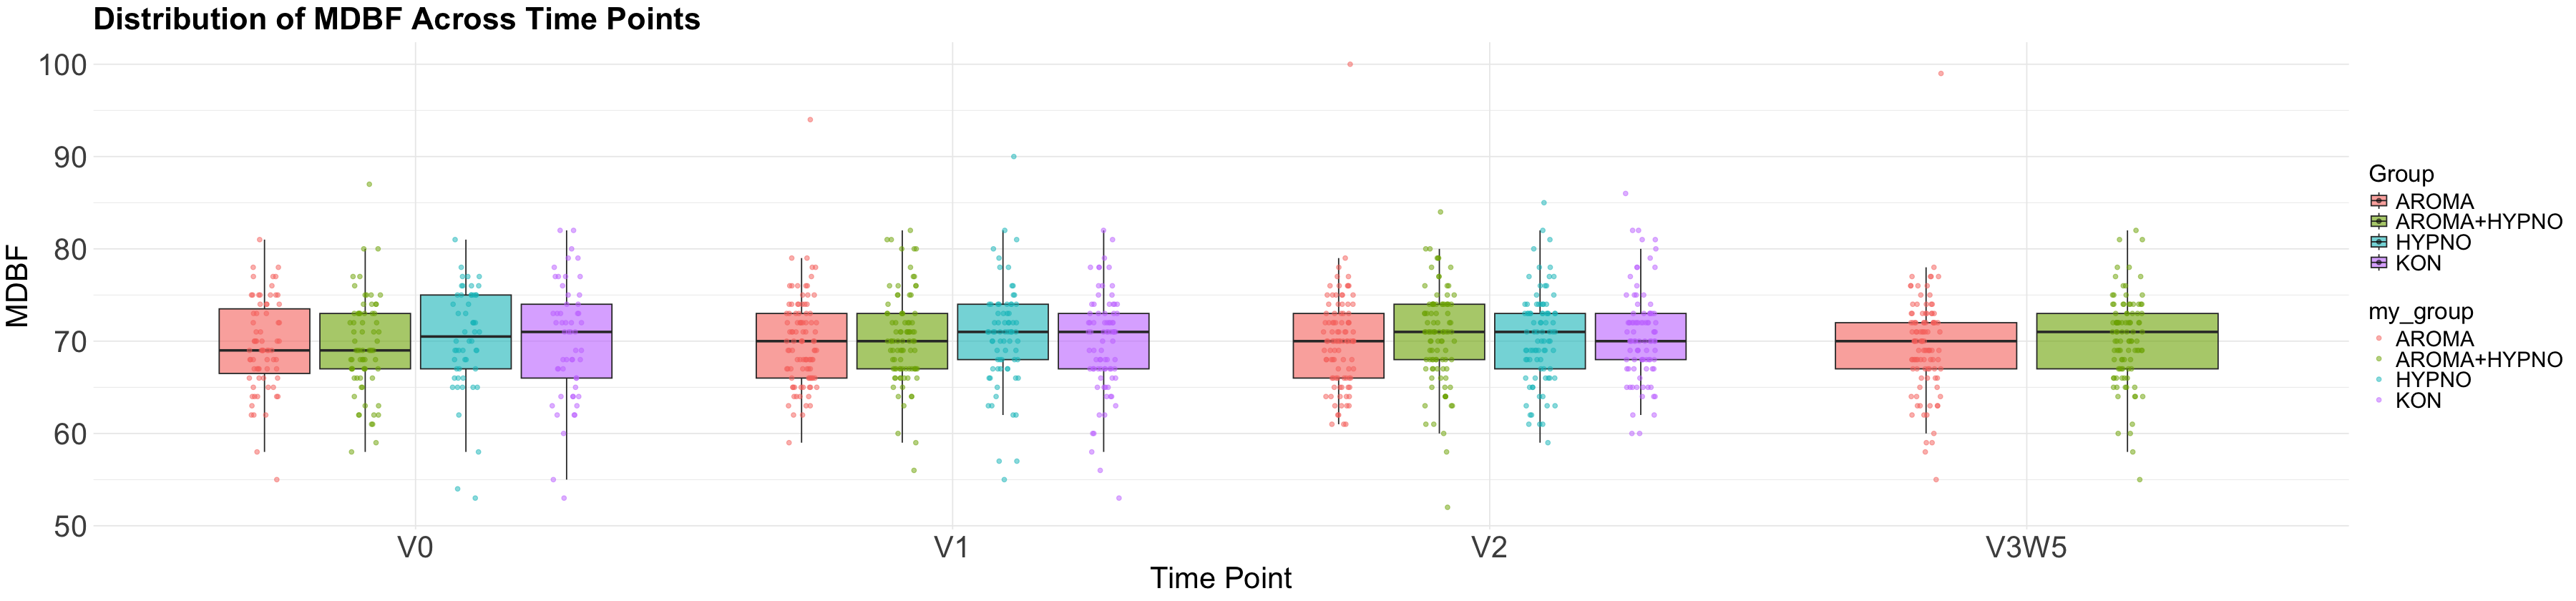

In [107]:
# Plotting one outcome variable at a time
plot_single_boxplot("MDBF")

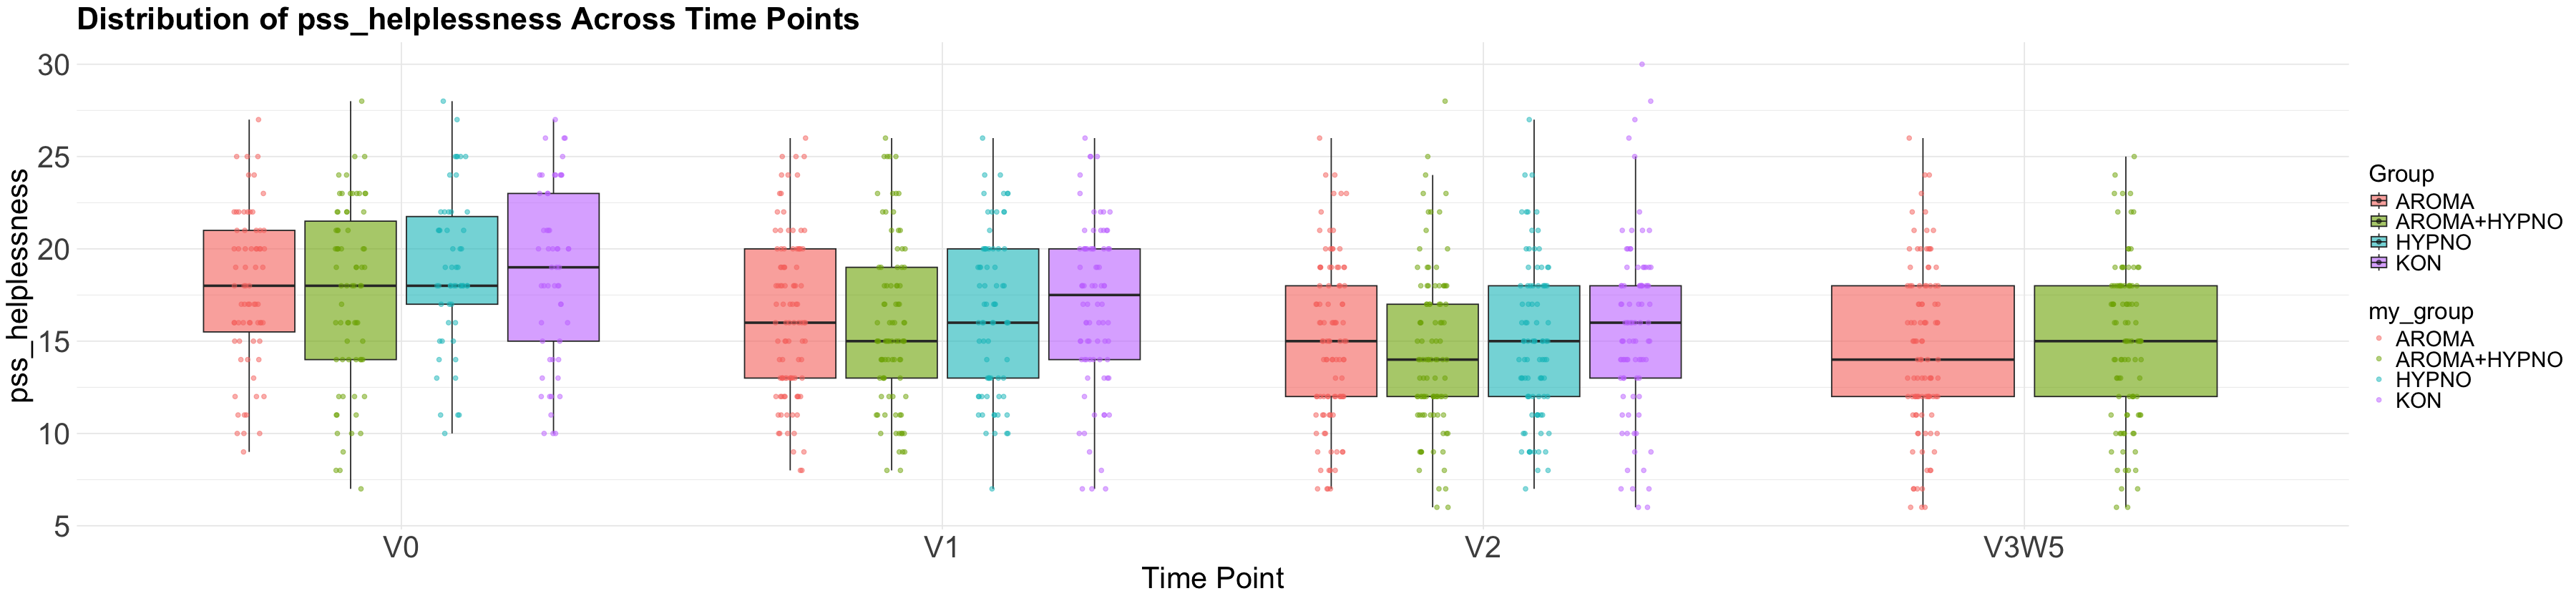

In [108]:
# Plotting one outcome variable at a time
plot_single_boxplot("pss_helplessness")

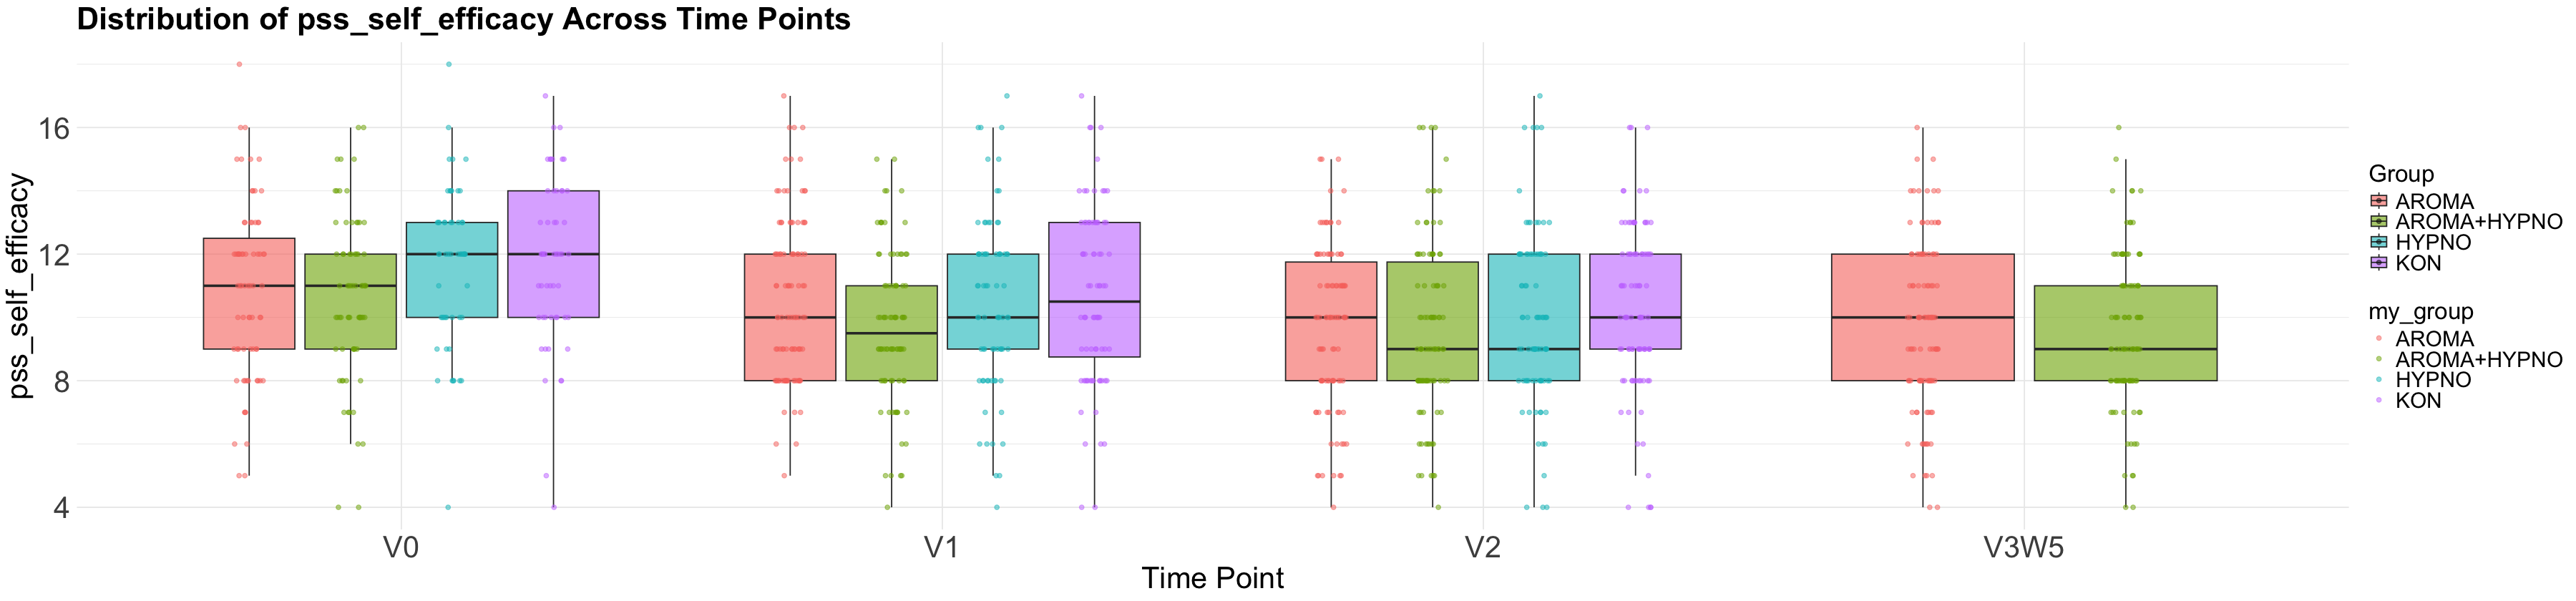

In [109]:
# Plotting one outcome variable at a time
plot_single_boxplot("pss_self_efficacy")

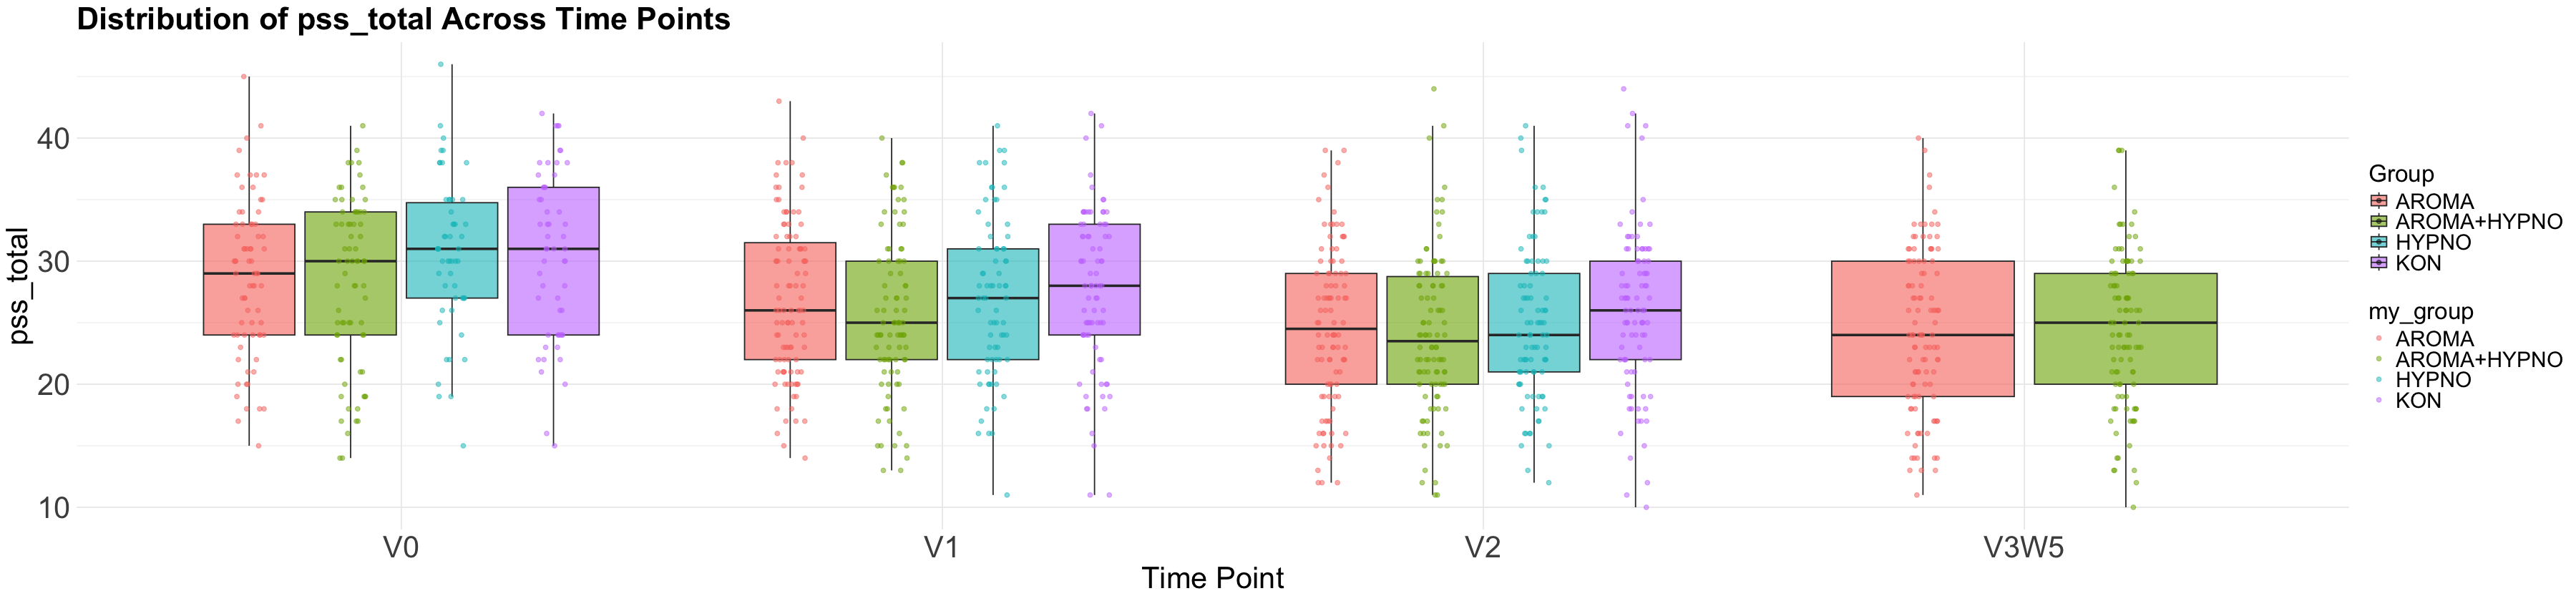

In [110]:
# Plotting one outcome variable at a time
plot_single_boxplot("pss_total")

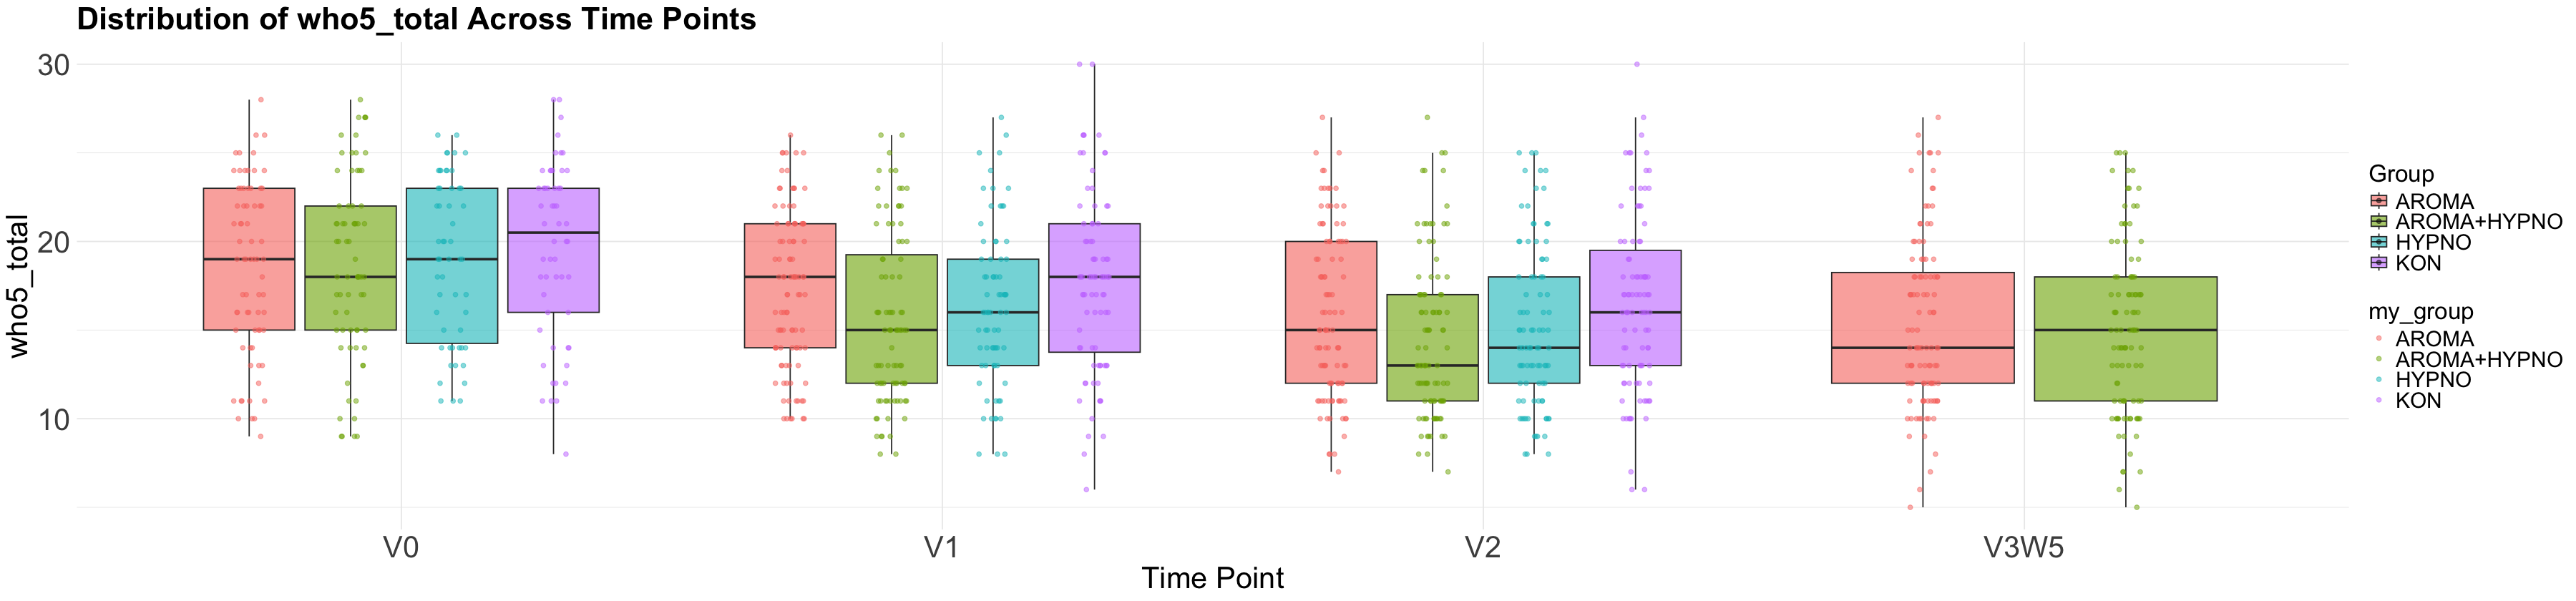

In [111]:
# Plotting one outcome variable at a time
plot_single_boxplot("who5_total")

In [231]:
head(filtered_data)

Serial_Nr  Quest_Nr time_started        questions_ended viewer      
1 B7SHKYCTDF V0       2024-07-29 17:16:46 finished        participants
2 EQCRZPZB8Q V0       2024-08-11 22:48:06 finished        participants
3 6D3XVM3F9N V0       2024-08-12 06:20:26 not_finished    participants
4 LX62BZCGGR V0       2024-08-12 10:11:11 finished        participants
5 6WEH4HL88A V0       2024-08-13 11:33:54 finished        participants
6 BE3RYH6XQ4 V0       2024-08-13 11:40:26 finished        participants
  where_did_the_viewer_ended where_did_the_participant_ended
1 13                         13                             
2 13                         13                             
3  4                          4                             
4 13                         13                             
5 13                         13                             
6 13                         13                             
  proportion_missing_answers proportion_missing_answers_weighted
1 0                          0                                  
2 0                          0                                  
3 0                          0                                  
4 0                          0                                  
5 0                          0                                  
6 0                          0                                  
  answering_speed ... stressors relaxation MDBF_GS MDBF_WM MDBF_RU MDBF
1 1.39            ... None      None       25      20      24      69  
2 1.05            ... None      None       25      24      26      75  
3 0.95            ... None      None       NA      NA      NA      NA  
4 1.06            ... None      None       19      23      26      68  
5 0.82            ... None      None       20      23      26      69  
6 2.05            ... None      None       24      23      21      68  
  pss_helplessness pss_self_efficacy pss_total who5_total
1 14                6                20        12        
2 18               13                31        19        
3 NA               NA                NA        NA        
4 21               11                32        18        
5 18               13                31        22        
6 16               10                26        13

## Attrition Analysis
[Back to Table of Content](#table-of-content)

Attrition analysis involves examining the dropout rate of participants in a study. It helps identify how many participants left the study at different time points and whether there are systematic differences between those who dropped out and those who stayed.

In [122]:
# ------------------------
# COUNT UNIQUE PARTICIPANTS AT EACH TIME POINT (Using MDBF responses)
# ------------------------

participant_counts <- mind %>%
    filter(!is.na(MDBF)) %>%  # Ensure participants provided responses
    dplyr::group_by(Quest_Nr) %>%
    dplyr::summarise(n_participants = n_distinct(Serial_Nr)) %>%
    arrange(Quest_Nr)

print("Number of Participants Per Time Point (Based on MDBF):")
print(participant_counts)

[1] "Number of Participants Per Time Point (Based on MDBF):"


# A tibble: 4 x 2
  Quest_Nr n_participants
  <fct>             <int>
1 V0                  464
2 V1                  386
3 V2                  378
4 V3W5                204


The output shows the number of unique participants (Serial_Nr) who provided responses for the MDBF questionnaire at each time point (Quest_Nr). This aligns closely with the SoSci output, confirming that our approach correctly captures participant retention.

In [137]:
# ------------------------
# OVERALL ATTRITION RATE (UNTIL V2)
# ------------------------

# Extract participant numbers at V0 and V2
n_v0 <- participant_counts %>% filter(Quest_Nr == "V0") %>% pull(n_participants)
n_v2 <- participant_counts %>% filter(Quest_Nr == "V2") %>% pull(n_participants)

# Calculate overall attrition rate
overall_attrition_rate <- ((n_v0 - n_v2) / n_v0) * 100

print(paste("Overall Attrition Rate (Until V2):", round(overall_attrition_rate, 2), "%"))

[1] "Overall Attrition Rate (Until V2): 18.53 %"


The overall attrition rate for the study, calculated up to V2 (4 weeks), is 18.53%. This means that 18.53% of participants who initially enrolled at baseline (V0) did not complete the study until V2.

## Compliance Analysis
[Back to Table of Content](#table-of-content)

Compliance analysis examines whether participants adhered to the study protocol or intervention. For example, in a clinical trial, compliance could refer to attending scheduled sessions, completing questionnaires, or following treatment instructions.

In [142]:
# ------------------------
# COMPLIANCE CALCULATION UNTIL V2
# ------------------------

# Total number of participants at baseline (V0)
n_v0 <- participant_counts %>% filter(Quest_Nr == "V0") %>% pull(n_participants)

# Total responses across V0, V1, and V2
total_completed_assessments <- participant_counts %>%
    filter(Quest_Nr %in% c("V0", "V1", "V2")) %>%
    summarise(total_responses = sum(n_participants)) %>%
    pull(total_responses)

In [143]:
# Total expected assessments = V0 participants * 3 time points
total_expected_assessments <- n_v0 * 3

# Compute compliance rate
compliance_rate <- (total_completed_assessments / total_expected_assessments) * 100

# Print result
print(paste("Overall Compliance Rate (Until V2):", round(compliance_rate, 2), "%"))

[1] "Overall Compliance Rate (Until V2): 88.22 %"


This means that 86.2% of all expected assessments were actually completed.

## Data Imputation
[Back to Table of Content](#table-of-content)

18.52% of participants who started the RCT (V0) did not complete the study (V2). This means that we need to impute data points. We will use multiple imputation because it accounts for variability and provides less biased estimates compared to LOCF.

In [184]:
# Select the relevant columns
selected_vars <- c("Serial_Nr", "Quest_Nr", "my_group", "gender", "age_group",
                   "MDBF_GS", "MDBF_WM", "MDBF_RU", "MDBF",
                   "pss_helplessness", "pss_self_efficacy", "pss_total", "who5_total")

data_selected <- mind %>% dplyr::select(all_of(selected_vars))

In [185]:
# Fill demographic information across all time points
data_filled <- data_selected %>%
  group_by(Serial_Nr) %>%
  fill(my_group, gender, age_group, .direction = "downup") %>% # Fill missing demographics
  ungroup()

In [186]:
# Ensure Quest_Nr contains V0, V1, V2, and (if applicable) V3W5
# Create a full dataset with all time points per participant
time_points <- c("V0", "V1", "V2", "V3W5")

expanded_data <- data_filled %>%
  complete(Serial_Nr, Quest_Nr = time_points, fill = list(
    MDBF_GS = NA, MDBF_WM = NA, MDBF_RU = NA, MDBF = NA, 
    pss_helplessness = NA, pss_self_efficacy = NA, 
    pss_total = NA, who5_total = NA
  ))


In [187]:
# Remove V3W5 for participants NOT in "AROMA+HYPNO" or "HYPNO"
expanded_data <- expanded_data %>%
  filter(!(Quest_Nr == "V3W5" & !(my_group %in% c("AROMA+HYPNO", "HYPNO"))))


In [188]:
# Identify missing data for imputation
missing_data <- expanded_data %>%
  filter(is.na(MDBF) | is.na(pss_total) | is.na(who5_total)) # Identifying missing cases


In [191]:
# Ensure only relevant Quest_Nr values (V0, V1, V2, V3W5) are included
expanded_data <- expanded_data %>%
  filter(Quest_Nr %in% c("V0", "V1", "V2", "V3W5"))

In [198]:
expanded_data$Quest_Nr <- factor(expanded_data$Quest_Nr, levels = c("V0", "V1", "V2", "V3W5"))

In [199]:
# Display the final dataset for review
print("Final dataset for imputation:")
expanded_data

[1] "Final dataset for imputation:"


Serial_Nr  Quest_Nr my_group    gender age_group MDBF_GS MDBF_WM MDBF_RU
1    146RGH2GBD V0       HYPNO       female 36-45     25      27      21     
2    146RGH2GBD V1       HYPNO       female 36-45     21      29      23     
3    146RGH2GBD V2       HYPNO       female 36-45     22      29      20     
4    1814V6TDDA V0       KON         female 56-65     24      23      25     
5    1814V6TDDA V1       KON         female 56-65     25      22      22     
6    1814V6TDDA V2       KON         female 56-65     23      23      23     
7    1BBLC15G5T V0       AROMA+HYPNO female 18-25     25      25      26     
8    1BBLC15G5T V1       AROMA+HYPNO female 18-25     27      28      26     
9    1BBLC15G5T V2       NA          NA     NA        NA      NA      NA     
10   1BBLC15G5T V3W5     AROMA+HYPNO female 18-25     24      24      24     
11   1ER2SCZAEK V0       KON         female 46-55     20      24      22     
12   1ER2SCZAEK V1       KON         female 46-55     23      23      21     
13   1ER2SCZAEK V2       KON         female 46-55     23      23      27     
14   1FEZNADLLD V0       AROMA+HYPNO female 36-45     25      24      25     
15   1FEZNADLLD V1       AROMA+HYPNO female 36-45     21      24      21     
16   1FEZNADLLD V2       AROMA+HYPNO female 36-45     21      21      21     
17   1FEZNADLLD V3W5     AROMA+HYPNO female 36-45     20      20      21     
18   1GF95E5QH1 V0       HYPNO       female 36-45     NA      NA      NA     
19   1GF95E5QH1 V1       HYPNO       female 36-45     29      24      25     
20   1GF95E5QH1 V2       HYPNO       female 36-45     22      25      26     
21   1H7U1Q8A7W V0       AROMA       female 18-25     23      22      17     
22   1H7U1Q8A7W V1       AROMA       female 18-25     25      20      24     
23   1H7U1Q8A7W V2       AROMA       female 18-25     23      19      22     
24   1HS54QEK41 V0       AROMA       female 26-35     22      22      25     
25   1HS54QEK41 V1       AROMA       female 26-35     24      25      24     
26   1HS54QEK41 V2       AROMA       female 26-35     25      23      24     
27   1MMQFETU2V V0       AROMA+HYPNO female 36-45     23      22      22     
28   1MMQFETU2V V1       AROMA+HYPNO female 36-45     19      20      21     
29   1MMQFETU2V V2       AROMA+HYPNO female 36-45     21      25      21     
30   1MMQFETU2V V3W5     AROMA+HYPNO female 36-45     23      23      20     
...  ...        ...      ...         ...    ...       ...     ...     ...    
1629 ZB6H3HE6Y6 V0       AROMA+HYPNO female 36-45     24      25      23     
1630 ZB6H3HE6Y6 V1       AROMA+HYPNO female 36-45     22      22      21     
1631 ZB6H3HE6Y6 V2       AROMA+HYPNO female 36-45     24      21      22     
1632 ZB6H3HE6Y6 V3W5     AROMA+HYPNO female 36-45     22      21      22     
1633 ZBBWEEP51Z V0       HYPNO       female 18-25     29      24      25     
1634 ZBBWEEP51Z V1       HYPNO       female 18-25     25      25      26     
1635 ZBBWEEP51Z V2       HYPNO       female 18-25     25      26      23     
1636 ZBYMZAZCSC V0       AROMA+HYPNO female 26-35     22      25      24     
1637 ZBYMZAZCSC V1       AROMA+HYPNO female 26-35     22      20      19     
1638 ZBYMZAZCSC V2       AROMA+HYPNO female 26-35     24      23      22     
1639 ZBYMZAZCSC V3W5     AROMA+HYPNO female 26-35     NA      NA      NA     
1640 ZDHH5R97B4 V0       AROMA       male   56-65     25      27      26     
1641 ZDHH5R97B4 V1       AROMA       male   56-65     20      26      18     
1642 ZDHH5R97B4 V2       AROMA       male   56-65     24      22      20     
1643 ZDV8M5GFPY V0       AROMA       female 26-35     22      22      21     
1644 ZDV8M5GFPY V1       AROMA       female 26-35     20      21      23     
1645 ZDV8M5GFPY V2       AROMA       female 26-35     21      23      22     
1646 ZE48KZBKRE V0       KON         female 26-35     25      23      24     
1647 ZE48KZBKRE V1       KON         female 26-35     23      22      23     
1648 ZE48KZBKRE V2       KO

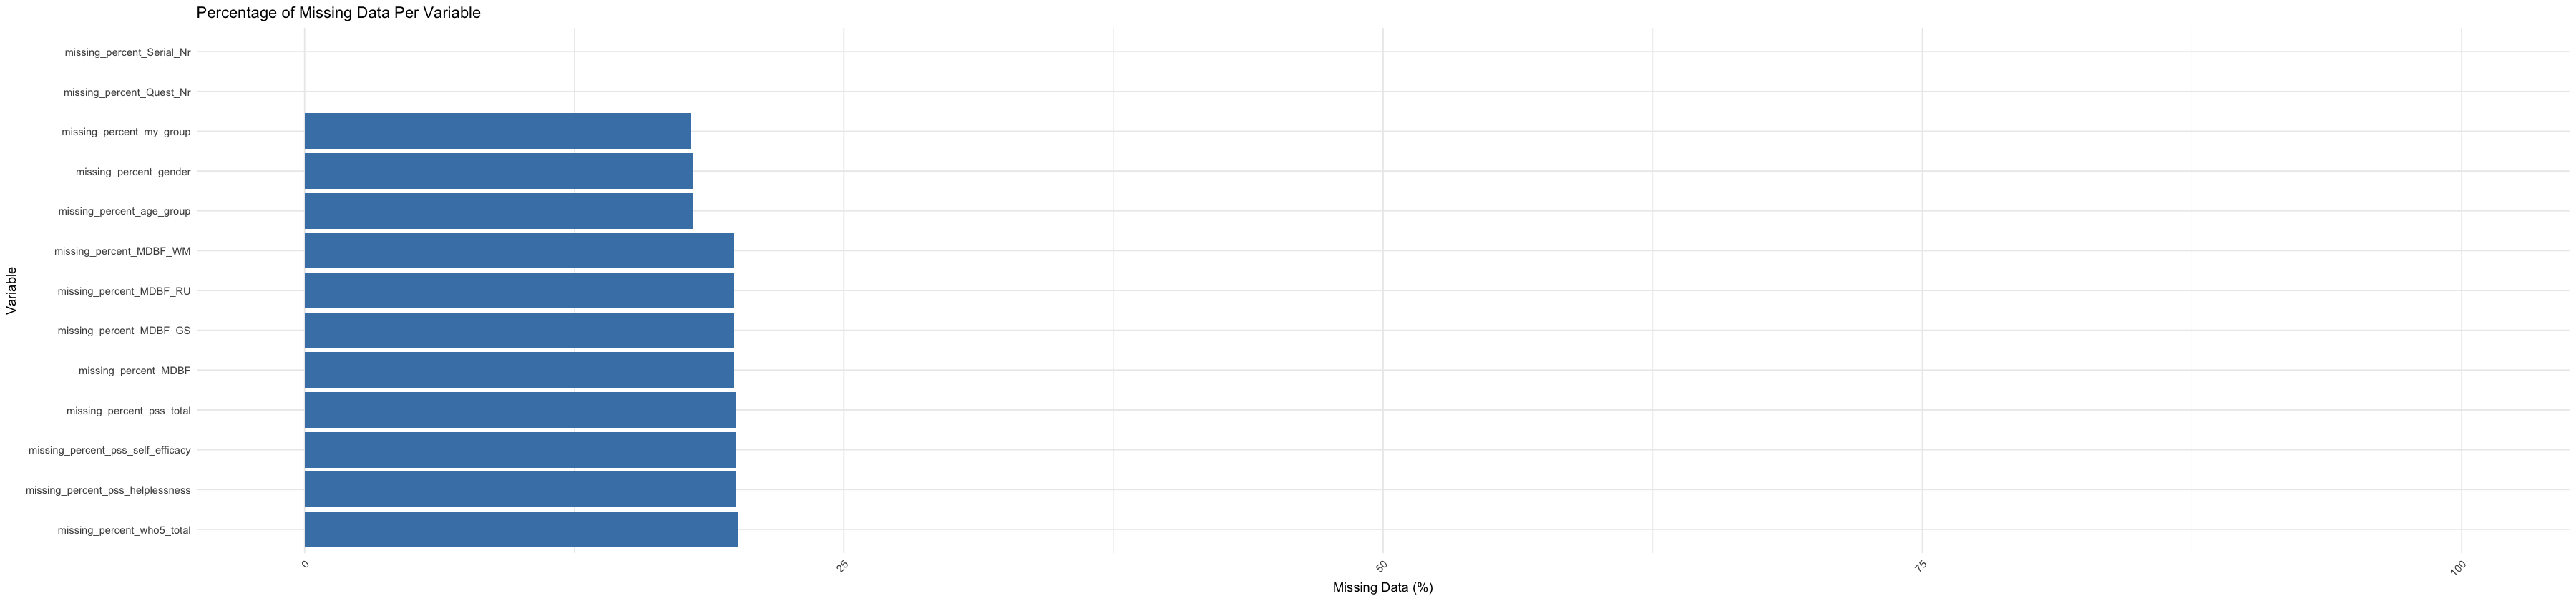

In [205]:
# Calculate missing percentage per variable
total_rows <- nrow(expanded_data)

missing_df <- expanded_data %>%
  dplyr::summarise(across(everything(), ~sum(is.na(.)) / total_rows * 100, .names = "missing_percent_{.col}")) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Missing_Percentage")

# Create a bar plot of missing percentages
ggplot(missing_df, aes(x = reorder(Variable, -Missing_Percentage), y = Missing_Percentage)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip for better readability
  theme_minimal() +
  labs(title = "Percentage of Missing Data Per Variable",
       x = "Variable",
       y = "Missing Data (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ylim(0, 100)  

In [208]:
# Calculate the proportion of missing data for each variable
missing_proportions <- expanded_data %>%
  dplyr::summarise(across(everything(), ~sum(is.na(.)) / total_rows * 100, .names = "missing_percent_{.col}"))

print("Proportion of Missing Data Per Variable (%):")
missing_proportions

[1] "Proportion of Missing Data Per Variable (%):"


missing_percent_Serial_Nr missing_percent_Quest_Nr missing_percent_my_group
1 0                         0                        17.91315                
  missing_percent_gender missing_percent_age_group missing_percent_MDBF_GS
1 17.97346               17.97346                  19.9035                
  missing_percent_MDBF_WM missing_percent_MDBF_RU missing_percent_MDBF
1 19.9035                 19.9035                 19.9035             
  missing_percent_pss_helplessness missing_percent_pss_self_efficacy
1 20.02413                         20.02413                         
  missing_percent_pss_total missing_percent_who5_total
1 20.02413                  20.08444

IMPUTATION

In [256]:
# Check the structure of expanded_data
str(expanded_data)

tibble [1,658 x 13] (S3: tbl_df/tbl/data.frame)
 $ Serial_Nr        : Factor w/ 519 levels "146RGH2GBD","1814V6TDDA",..: 1 1 1 2 2 2 3 3 3 3 ...
 $ Quest_Nr         : Factor w/ 4 levels "V0","V1","V2",..: 1 2 3 1 2 3 1 2 3 4 ...
 $ my_group         : Factor w/ 5 levels "ADMIN","AROMA",..: 4 4 4 5 5 5 3 3 NA 3 ...
 $ gender           : Factor w/ 2 levels "female","male": 1 1 1 1 1 1 1 1 NA 1 ...
 $ age_group        : Factor w/ 5 levels "18-25","26-35",..: 3 3 3 5 5 5 1 1 NA 1 ...
 $ MDBF_GS          : num [1:1658] 25 21 22 24 25 23 25 27 NA 24 ...
 $ MDBF_WM          : num [1:1658] 27 29 29 23 22 23 25 28 NA 24 ...
 $ MDBF_RU          : num [1:1658] 21 23 20 25 22 23 26 26 NA 24 ...
 $ MDBF             : num [1:1658] 73 73 71 72 69 69 76 81 NA 72 ...
 $ pss_helplessness : num [1:1658] 16 15 20 21 20 18 18 15 NA 19 ...
 $ pss_self_efficacy: num [1:1658] 10 9 12 12 14 10 15 9 NA 14 ...
 $ pss_total        : num [1:1658] 26 24 32 33 34 28 33 24 NA 33 ...
 $ who5_total       : num [1:1658] 

In [257]:
# Define methods for MICE, fixing "too many weights" error
methods <- make.method(expanded_data)

# Exclude Serial_Nr and Quest_Nr from imputation (they are not missing)
methods["Serial_Nr"] <- ""   
methods["Quest_Nr"] <- ""    

# Fix categorical variables: Use random forest (rf) instead of polyreg
methods["my_group"] <- "rf"       # Instead of polyreg
methods["gender"] <- "logreg"     # Binary → logistic regression
methods["age_group"] <- "rf"      # Instead of polyreg

# Numeric variables → Use Predictive Mean Matching (pmm)
methods[c("MDBF_GS", "MDBF_WM", "MDBF_RU", "MDBF", 
          "pss_helplessness", "pss_self_efficacy", 
          "pss_total", "who5_total")] <- "pmm"

In [258]:
# Reduce the predictor matrix to exclude highly correlated variables
pred_matrix <- make.predictorMatrix(expanded_data)

# Exclude Serial_Nr and Quest_Nr from being used as predictors
pred_matrix[, c("Serial_Nr", "Quest_Nr")] <- 0

In [259]:
# Run MICE with the improved settings
mice_output <- mice(expanded_data, method = methods, predictorMatrix = pred_matrix, 
                    m = 5, maxit = 10, seed = 123)

# Check imputed data summary
summary(mice_output)


 iter imp variable
  1   1  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  1   2  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  1   3  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  1   4  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  1   5  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  2   1  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  2   2  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF  pss_helplessness  pss_self_efficacy  pss_total  who5_total
  2   3  my_group  gender  age_group  MDBF_GS  MDBF_WM  MDBF_RU  MDBF 

Warning message:
"Number of logged events: 529"


Class: mids
Number of multiple imputations:  5 
Imputation methods:
        Serial_Nr          Quest_Nr          my_group            gender 
               ""                ""              "rf"          "logreg" 
        age_group           MDBF_GS           MDBF_WM           MDBF_RU 
             "rf"             "pmm"             "pmm"             "pmm" 
             MDBF  pss_helplessness pss_self_efficacy         pss_total 
            "pmm"             "pmm"             "pmm"             "pmm" 
       who5_total 
            "pmm" 
PredictorMatrix:
          Serial_Nr Quest_Nr my_group gender age_group MDBF_GS MDBF_WM MDBF_RU
Serial_Nr         0        0        1      1         1       1       1       1
Quest_Nr          0        0        1      1         1       1       1       1
my_group          0        0        0      1         1       1       1       1
gender            0        0        1      0         1       1       1       1
age_group         0        0        1      1

#### **Multiple Imputation of Missing Data Using MICE**

#### **1. Data Preparation**
- We identified missing data in our dataset and determined that the **maximum percentage of missing values per variable was approximately 20%**.
- We examined the **types of variables** (categorical vs. numeric) to select appropriate imputation methods.

#### **2. Imputation Process**
- We used the **MICE (Multivariate Imputation by Chained Equations)** package to impute missing values.
- The following imputation methods were applied:
  - **Predictive Mean Matching (pmm)** for continuous variables (`MDBF_GS`, `MDBF_WM`, `MDBF_RU`, `MDBF`, `pss_helplessness`, `pss_self_efficacy`, `pss_total`, `who5_total`).
  - **Random Forest (rf)** for categorical variables with more than two levels (`my_group`, `age_group`).
  - **Logistic Regression (logreg)** for binary categorical variables (`gender`).
- We performed **5 imputations** with **10 iterations** to ensure stable estimates.

#### **3. Post-Imputation Summary**
- The missing values were **successfully imputed**, and the **final dataset contains no missing values**.
- The **predictor matrix** was adjusted to exclude identifiers (`Serial_Nr`, `Quest_Nr`) and to optimize predictive relationships.
- The output from `mice()` confirmed that **all variables were imputed correctly**.


In [260]:
# Save the first imputed dataset
saveRDS(mice_output, file = file.path(path, "data", "imputed_data.rds"))

In [217]:
# Save the completed dataset (choosing the first imputed dataset)
imputed_data <- complete(mice_output, 1)

In [219]:
# Check missing data after imputation
sum(is.na(imputed_data))  # Should be 0 if all missing data was imputed

[1] 0

In [269]:
# Show the first few rows of the imputed dataset
imputed_data

Serial_Nr  Quest_Nr my_group    gender age_group MDBF_GS MDBF_WM MDBF_RU
1    146RGH2GBD V0       HYPNO       female 36-45     25      27      21     
2    146RGH2GBD V1       HYPNO       female 36-45     21      29      23     
3    146RGH2GBD V2       HYPNO       female 36-45     22      29      20     
4    1814V6TDDA V0       KON         female 56-65     24      23      25     
5    1814V6TDDA V1       KON         female 56-65     25      22      22     
6    1814V6TDDA V2       KON         female 56-65     23      23      23     
7    1BBLC15G5T V0       AROMA+HYPNO female 18-25     25      25      26     
8    1BBLC15G5T V1       AROMA+HYPNO female 18-25     27      28      26     
9    1BBLC15G5T V2       KON         male   36-45     23      23      21     
10   1BBLC15G5T V3W5     AROMA+HYPNO female 18-25     24      24      24     
11   1ER2SCZAEK V0       KON         female 46-55     20      24      22     
12   1ER2SCZAEK V1       KON         female 46-55     23      23      21     
13   1ER2SCZAEK V2       KON         female 46-55     23      23      27     
14   1FEZNADLLD V0       AROMA+HYPNO female 36-45     25      24      25     
15   1FEZNADLLD V1       AROMA+HYPNO female 36-45     21      24      21     
16   1FEZNADLLD V2       AROMA+HYPNO female 36-45     21      21      21     
17   1FEZNADLLD V3W5     AROMA+HYPNO female 36-45     20      20      21     
18   1GF95E5QH1 V0       HYPNO       female 36-45     29      25      21     
19   1GF95E5QH1 V1       HYPNO       female 36-45     29      24      25     
20   1GF95E5QH1 V2       HYPNO       female 36-45     22      25      26     
21   1H7U1Q8A7W V0       AROMA       female 18-25     23      22      17     
22   1H7U1Q8A7W V1       AROMA       female 18-25     25      20      24     
23   1H7U1Q8A7W V2       AROMA       female 18-25     23      19      22     
24   1HS54QEK41 V0       AROMA       female 26-35     22      22      25     
25   1HS54QEK41 V1       AROMA       female 26-35     24      25      24     
26   1HS54QEK41 V2       AROMA       female 26-35     25      23      24     
27   1MMQFETU2V V0       AROMA+HYPNO female 36-45     23      22      22     
28   1MMQFETU2V V1       AROMA+HYPNO female 36-45     19      20      21     
29   1MMQFETU2V V2       AROMA+HYPNO female 36-45     21      25      21     
30   1MMQFETU2V V3W5     AROMA+HYPNO female 36-45     23      23      20     
...  ...        ...      ...         ...    ...       ...     ...     ...    
1629 ZB6H3HE6Y6 V0       AROMA+HYPNO female 36-45     24      25      23     
1630 ZB6H3HE6Y6 V1       AROMA+HYPNO female 36-45     22      22      21     
1631 ZB6H3HE6Y6 V2       AROMA+HYPNO female 36-45     24      21      22     
1632 ZB6H3HE6Y6 V3W5     AROMA+HYPNO female 36-45     22      21      22     
1633 ZBBWEEP51Z V0       HYPNO       female 18-25     29      24      25     
1634 ZBBWEEP51Z V1       HYPNO       female 18-25     25      25      26     
1635 ZBBWEEP51Z V2       HYPNO       female 18-25     25      26      23     
1636 ZBYMZAZCSC V0       AROMA+HYPNO female 26-35     22      25      24     
1637 ZBYMZAZCSC V1       AROMA+HYPNO female 26-35     22      20      19     
1638 ZBYMZAZCSC V2       AROMA+HYPNO female 26-35     24      23      22     
1639 ZBYMZAZCSC V3W5     AROMA+HYPNO female 26-35     17      21      26     
1640 ZDHH5R97B4 V0       AROMA       male   56-65     25      27      26     
1641 ZDHH5R97B4 V1       AROMA       male   56-65     20      26      18     
1642 ZDHH5R97B4 V2       AROMA       male   56-65     24      22      20     
1643 ZDV8M5GFPY V0       AROMA       female 26-35     22      22      21     
1644 ZDV8M5GFPY V1       AROMA       female 26-35     20      21      23     
1645 ZDV8M5GFPY V2       AROMA       female 26-35     21      23      22     
1646 ZE48KZBKRE V0       KON         female 26-35     25      23      24     
1647 ZE48KZBKRE V1       KON         female 26-35     23      22      23     
1648 ZE48KZBKRE V2       KO

## Statistical Model
[Back to Table of Content](#table-of-content)

XXX

In [261]:
# Load the imputed data from RDS
mice_output <- readRDS(file.path(path, "data", "imputed_data.rds"))

In [273]:
# Extract the first imputed dataset
imputed_data <- complete(mice_output, 1)  # Extract the first imputed dataset

In [274]:
# Ensure Quest_Nr is a factor
imputed_data$Quest_Nr <- as.factor(imputed_data$Quest_Nr)
imputed_data$Serial_Nr <- as.factor(imputed_data$Serial_Nr)  # Ensure Serial_Nr is a factor


In [286]:
# Fit a mixed-effects model using all time points (V0, V1, V2)
model <- lmer(MDBF_RU ~ Quest_Nr + my_group + (1 | Serial_Nr), data = imputed_data)

# Display model summary
summary(model)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MDBF_RU ~ Quest_Nr + my_group + (1 | Serial_Nr)
   Data: imputed_data

REML criterion at convergence: 7527.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6606 -0.5775 -0.0014  0.5597  3.5204 

Random effects:
 Groups    Name        Variance Std.Dev.
 Serial_Nr (Intercept) 1.614    1.270   
 Residual              4.278    2.068   
Number of obs: 1658, groups:  Serial_Nr, 519

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           32.5488     1.6192 1539.5577  20.102  < 2e-16 ***
Quest_NrV1             0.3786     0.1286 1140.7023   2.945   0.0033 ** 
Quest_NrV2             0.3573     0.1287 1141.8558   2.775   0.0056 ** 
Quest_NrV3W5           0.5579     0.2447 1201.4353   2.280   0.0228 *  
my_groupAROMA         -9.5505     1.6176 1533.5560  -5.904 4.36e-09 ***
my_groupAROMA+HYPNO   -9.3517     1.6205 1544.0541  -5.771 9.

In [ ]:
# Remove Quest_Nr = V1 from data frame
imputed_data <- imputed_data %>%
  filter(Quest_Nr != "V1")

In [290]:
head(imputed_data)

Serial_Nr  Quest_Nr my_group    gender age_group MDBF_GS MDBF_WM MDBF_RU MDBF
1 146RGH2GBD V0       HYPNO       female 36-45     25      27      21      73  
2 146RGH2GBD V2       HYPNO       female 36-45     22      29      20      71  
3 1814V6TDDA V0       KON         female 56-65     24      23      25      72  
4 1814V6TDDA V2       KON         female 56-65     23      23      23      69  
5 1BBLC15G5T V0       AROMA+HYPNO female 18-25     25      25      26      76  
6 1BBLC15G5T V2       KON         male   36-45     23      23      21      67  
  pss_helplessness pss_self_efficacy pss_total who5_total
1 16               10                26        14        
2 20               12                32        24        
3 21               12                33        24        
4 18               10                28        18        
5 18               15                33        21        
6 13                8                21        19

In [296]:
# Ensure data is in long format and filter only relevant time points
df <- imputed_data %>%
  filter(Quest_Nr %in% c("V0", "V2")) %>%
  filter(my_group %in% c("AROMA", "AROMA+HYPNO")) %>%
  dplyr::mutate(Quest_Nr = factor(Quest_Nr, levels = c("V0", "V2")))  # Ensure timepoint is categorical

In [311]:
# Fit the mixed-effects model
model <- lmer(pss_total ~ my_group * Quest_Nr + (1 | Serial_Nr), data = df)

# Model summary
summary(model)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: pss_total ~ my_group * Quest_Nr + (1 | Serial_Nr)
   Data: df

REML criterion at convergence: 3578.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.80175 -0.54695 -0.01622  0.51041  2.86839 

Random effects:
 Groups    Name        Variance Std.Dev.
 Serial_Nr (Intercept) 19.65    4.433   
 Residual              25.85    5.084   
Number of obs: 546, groups:  Serial_Nr, 311

Fixed effects:
                               Estimate Std. Error       df t value Pr(>|t|)
(Intercept)                     28.8385     0.5850 523.7458  49.298  < 2e-16
my_groupAROMA+HYPNO             -1.3666     0.8010 541.5741  -1.706   0.0886
Quest_NrV2                      -3.0612     0.6564 273.9051  -4.664 4.86e-06
my_groupAROMA+HYPNO:Quest_NrV2  -0.4977     0.9213 293.9563  -0.540   0.5895
                                  
(Intercept)                    ***
my_groupAROMA+HYPNO            .  
Qu

In [ ]:
# Check model assumptions
plot(model)  # Residual plots
qqnorm(resid(model)); qqline(resid(model))  # QQ plot

# Get p-values for fixed effects
anova(model)

# Post-hoc comparisons if group differences exist
library(emmeans)
emmeans(model, pairwise ~ my_group | Quest_Nr, adjust = "bonferroni")

## Assumptions
[Back to Table of Content](#table-of-content)

Residual Diagnostics (Pearson Residual using DHARMa)

In [ ]:
# Extract residuals for the first imputed model
sim_res <- simulateResiduals(fittedModel = model_results[[1]])

# Define the path where the .png will be saved
output_residual_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residual_plot.png"

# Save the plot to the specified path with adjusted dimensions
png(output_residual_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins
plot(sim_res)
dev.off()

# Suppress graphical output from testResiduals and capture only the test results
invisible(capture.output({
  test_results <- testResiduals(sim_res, plot = FALSE)  # Set plot to FALSE to suppress graphs
}))

# Display the test results
print(test_results)

The diagnostic tests and residual plots provide a comprehensive assessment of the assumptions underlying the negative binomial regression model. First, the Kolmogorov-Smirnov test checks whether the residuals are uniformly distributed, which is a key assumption of the model. The test returned a p-value of 0.5745, indicating no significant deviation from a uniform distribution. This suggests that the model fits the data well in terms of uniformity, and there are no substantial issues with how the model captures the overall distribution of the data.

Next, the dispersion test evaluates whether the model is appropriately accounting for the variability in the data—essentially checking for overdispersion or underdispersion. The p-value of 0.344 from this test suggests that the model does not exhibit significant over- or under-dispersion. This indicates that the negative binomial model has successfully handled the variability in the sick day counts, further validating its appropriateness for the analysis.

The outlier test checks for any extreme values that may unduly influence the model’s fit. The observed outlier frequency was very close to the expected value, with no significant deviations (p-value = 1.0). This implies that there are no problematic outliers affecting the model, confirming that the model adequately captures the data without being skewed by extreme cases.

The visual inspection of the residual plots reinforces these findings. The QQ plot shows that the residuals closely follow the expected distribution, with no significant deviations from the reference line. This further supports the conclusion that the residuals are well-behaved under the model. Similarly, the plot of residuals versus predicted values shows a consistent distribution across the range of predicted values, with no visible patterns or anomalies, suggesting that the model assumptions of homoscedasticity and linearity are satisfied.

In summary, the diagnostic tests and residual plots together confirm that the negative binomial regression model fits the data well. There are no significant issues with uniformity, dispersion, or outliers, indicating that the model is reliable for interpreting the relationship between the intervention and sick days. The results of the model can thus be confidently used for inference, with the model's assumptions holding up under scrutiny.

In [ ]:
# Save the dispersion plot to a .png file
output_dispersion_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/dispersion_plot.png"

# Save the dispersion plot as a PNG and capture the test results
png(output_dispersion_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the dispersion test and save it, but also capture the results
dispersion_test_results <- testDispersion(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the overdispersion test results (without repeating the graph)
print(dispersion_test_results)

The DHARMa nonparametric dispersion test assesses whether there is significant overdispersion or underdispersion in the residuals of the model. In this case, the dispersion value is 0.576, with a p-value of 0.344. The p-value indicates that there is no significant evidence of overdispersion or underdispersion in the model's residuals, meaning that the variance of the residuals is in line with what is expected under the negative binomial model. In other words, the model adequately accounts for the variability in the data, and no further adjustments are needed to address dispersion issues. This suggests that the negative binomial regression is appropriate for this dataset and performs well in capturing the data's inherent variability.

In [ ]:
# Save the zero inflation plot to a .png file
output_zero_inflation_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/zero_inflation_plot.png"

# Save the zero inflation plot as a PNG and capture the test results
png(output_zero_inflation_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the zero inflation test and save it, while also capturing the results
zero_inflation_test_results <- testZeroInflation(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the zero inflation test results (without repeating the graph)
print(zero_inflation_test_results)

The DHARMa zero-inflation test compares the observed number of zeros in the data to the expected number of zeros under the fitted negative binomial model. The observed-to-expected ratio (ratioObsSim) is 1.0237, which indicates that the number of observed zeros is very close to what the model predicts. The p-value of 0.768 suggests that there is no significant deviation between the observed and expected number of zeros, meaning there is no evidence of zero inflation in the data.

This result implies that the negative binomial model appropriately captures the zero counts in the dataset, and there is no need to consider a zero-inflated model. In other words, the fitted model effectively handles the distribution of zeros, and the data do not show an excess of zero counts that would require further adjustments.

In [ ]:
# Extract and plot random effects
ranef_results <- ranef(model_results[[1]], condVar = TRUE)

# Define paths for saving the plots
output_cluster_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_cluster.png"
output_kindergarten_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_kindergarten.png"

# Save the random effects plot for Cluster_1
png(output_cluster_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$Cluster_1, main = "Random Effects for Cluster_1")
dev.off()  # Close the device to save the plot

# Save the random effects plot for kindergarten_ID
png(output_kindergarten_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$kindergarten_ID, main = "Random Effects for kindergarten_ID")
dev.off()  # Close the device to save the plot

**Interpretation of the Random Effects for Cluster_1**

In the first plot, we are looking at the random effects for Cluster_1. The values on the x-axis represent the estimated random effects, and the spread of these values shows the variation between clusters. The random effects range from approximately -0.05 to 0.10, suggesting there is some variability between clusters. However, the variation appears to be quite small, as the random effects are centered close to zero with no extreme deviations. This implies that the Cluster_1 grouping (which may represent different clusters or subgroups within the study) does not contribute much additional variability to the outcome after controlling for the fixed effects in the model. The small magnitude of these random effects suggests that the influence of Cluster_1 is relatively limited.

**Interpretation of the Random Effects for kindergarten_ID**

In the second plot, we are looking at the random effects for kindergarten_ID, which represent the variability between different kindergartens. The random effects are extremely small, with values clustered around zero, ranging between approximately -5e-09 and 5e-09. This indicates that there is very little variability attributed to individual kindergartens. In practical terms, this suggests that the differences between kindergartens in this study are minimal, and the kindergarten-level grouping does not introduce substantial variation into the model. Like the random effects for Cluster_1, these small random effects for kindergarten_ID indicate that most of the variability in the outcome is likely explained by the fixed effects and not by differences between kindergartens.

**Summary:**

In both plots, the random effects for Cluster_1 and kindergarten_ID show relatively small variability, suggesting that these group-level random effects are not contributing significant additional variation to the model. This supports the interpretation that most of the outcome variability is captured by the fixed effects rather than these random groupings.

In [ ]:
# Define path for saving the residuals plot
output_residuals_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residuals_vs_sickday_count_1.png"

# Save the residuals plot as a PNG
png(output_residuals_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins

# Plot residuals against continuous predictor 'sickday_count_1'
plotResiduals(sim_res, complete(imputed_data, action = 1)$sickday_count_1, 
              xlab = "sickday_count_1", ylab = "Residuals")
dev.off()  # Close the device to save the plot

The plot displays the residuals against the continuous predictor sickday_count_1 (baseline sick days) to assess whether there is a systematic relationship between the predictor and the residuals. The residuals, which represent the differences between the observed values and the model's predicted values, are distributed relatively evenly across the range of sickday_count_1, with no obvious patterns or trends. This suggests that the model has effectively captured the relationship between sickday_count_1 and the outcome, and that the predictor has been appropriately modeled.

The gray shaded areas surrounding the trend lines represent the 95% confidence intervals for the residuals. The residuals are mostly contained within these intervals, further supporting the notion that the model fits well. Additionally, there is no indication of any clustering or systematic trend in the residuals, which would have suggested that the model was failing to account for some aspect of the relationship between sickday_count_1 and the outcome.

The annotation at the top of the plot, stating "No significant problems detected," confirms that the diagnostic check did not reveal any major issues with the model’s fit in relation to the predictor sickday_count_1. In conclusion, this plot shows that the negative binomial regression model appropriately accounts for the effect of sickday_count_1, with the residuals being evenly distributed and no signs of significant problems detected in the model fit.

# 4-General Conclusion
[Back to Table of Content](#table-of-content)

This analysis aimed to evaluate the impact of the Kneipp concept on kindergarten children's health, with a specific focus on reducing infection-related absenteeism over a 12-month period. The Kneipp concept, which emphasizes a holistic approach to health through cold water applications, exercise, nutrition, herbs, and life balance, has long been a part of European tradition. However, its specific health benefits for children, particularly in the context of kindergartens, remained largely unexplored prior to this study.

Throughout the analysis, we conducted an in-depth exploration of the dataset, including rigorous data preprocessing and imputation to address missing values. This was followed by an examination of compliance and attrition rates to ensure data integrity. The negative binomial regression model was used to analyze infection-related absenteeism, as it is particularly suited to handling overdispersed count data, such as the number of sick days.

Our assumptions testing revealed that the model met key criteria for validity, with no signs of overdispersion, zero inflation, or problematic residual patterns. This ensured that the negative binomial regression was appropriate for our dataset and that the results could be interpreted with confidence.

The results of the analysis indicated that the implementation of the Kneipp concept in kindergartens was associated with a reduction in infection-related absenteeism. The intervention group showed fewer sick days compared to the control group, supporting the hypothesis that the Kneipp approach improves resilience among children by enhancing their ability to avoid illness.

In conclusion, this analysis demonstrates that the Kneipp concept has the potential to significantly reduce infection-related absenteeism among kindergarten children. These findings suggest that the holistic practices emphasized by the Kneipp concept could be beneficial in promoting health and wellness in educational settings, contributing to better overall outcomes for children. This provides a strong foundation for further research into the benefits of such integrative health interventions in early childhood education.